# Music genre prediction [M1_26DS+]

## Введение

Популярный музыкальный стриминговый сервис "МиФаСоль" расширяет работу с новыми артистами и музыкантами, в связи с чем возникла задача - правильно классифицировать новые музыкальные треки, чтобы улучшить работу рекомендательной системы. Сотрудники отдела работы со звуком подготовили датасет, в котором собраны некоторые характеристики музыкальных произведений и их жанры. Наша задача - разработать модель, позволяющую классифицировать музыкальные произведения по жанрам.


**Цель проекта:** разработать модель для предсказания музыкальных жанров.
                
                                    
**Данные**

  - Тренировочный набор даных (**train.csv**) - информация (~20000) о музыкальных треках с указанием жанра.
  
  - Тестовый набор (**test.csv**) - информация (~5000) о музыкальных треках без указания жанра.
  
  - Файл предсказаний в правильном формате (**sample_submit.csv**).

                       
  - **music_genre** - Целевой признак.
    
    - Задача - для каждого трека предсказать значение целевого признака, соответствующее  музыкальному жанру.  


- *Описание полей данных:*

   - **instance_id** -Уникальный идентификатор трека.
   - **track_name** - Название трека.
   - **acousticness** - Мера уверенности от 0,0 до 1,0 в том, что трек является акустическим. 1,0 означает высокую степень уверенности в том, что трек является акустическим.
   - **danceability** - Танцевальность описывает, насколько трек подходит для танцев, основываясь на сочетании музыкальных элементов, включая темп, стабильность ритма, силу ударов и общую регулярность. Значение 0,0 означает наименьшую танцевальность, а 1,0 - наибольшую танцевальность.
   - **duration_ms** - Продолжительность трека в миллисекундах.
   - **energy** - Энергия это показатель от 0,0 до 1,0, представляющий собой меру интенсивности и активности. Как правило, энергичные композиции ощущаются как быстрые, громкие и шумные. Например, дэт-метал обладает высокой энергией, в то время как прелюдия Баха имеет низкую оценку этого параметра.
   - **instrumentalness** - Определяет, содержит ли трек вокал. Звуки "Ooh" и "aah" в данном контексте рассматриваются как инструментальные. Рэп или разговорные треки явно являются "вокальными". Чем ближе значение инструментальности к 1,0, тем больше вероятность того, что трек не содержит вокала.
   - **key** - базовый ключ (нота) произведения.
   - **liveness** - Определяет присутствие аудитории в записи. Более высокие значения liveness означают увеличение вероятности того, что трек был исполнен вживую. Значение выше 0,8 обеспечивает высокую вероятность того, что трек исполняется вживую.
   - **loudness** - Общая громкость трека в децибелах (дБ).
   - **mode** - Указывает на модальность (мажорную или минорную) трека.
   - **speechiness** - Речевой характер определяет наличие в треке разговорной речи. Чем более исключительно речевой характер носит запись (например, ток-шоу, аудиокнига, поэзия), тем ближе значение атрибута к 1,0. Значения выше 0,66 характеризуют треки, которые, вероятно, полностью состоят из разговорной речи. Значения от 0,33 до 0,66 характеризуют треки, которые могут содержать как музыку, так и речь, как в виде фрагментов, так и в виде слоев, включая такие случаи, как рэп-музыка. Значения ниже 0,33, скорее всего, представляют музыку и другие неречевые треки.
   - **tempo** - Темп трека в ударах в минуту (BPM). В музыкальной терминологии темп представляет собой скорость или темп данного произведения и напрямую зависит от средней продолжительности тактов.
   - **obtained_date** - дата загрузки в сервис.
   - **valence** - Показатель от 0,0 до 1,0, характеризующий музыкальный позитив, передаваемый треком. Композиции с высокой валентностью звучат более позитивно (например, радостно, весело, эйфорично), а композиции с низкой валентностью - более негативно (например, грустно, депрессивно, сердито).
   - **music_genre** - Музыкальный жанр трека.

**План выполнения проекта:**

  - Загрузить и изучить данные;
  
  - Провести предобработку; 
  
  - Провести разведочный анализ данных;
  
  - Разработать новые синтетические признаки;
  
  - Проверить признаки на мультиколлинеарность;
  
  - Отобрать финальный набор обучающих признаков;
  
  - Выбрать и обучить модели;
  
  - Оценить качество предсказания лучшей модели;
  
  - Провести анализ важности ее признаков;
  
  - Сформулировать и оформить промежуточный и общий выводы.

## Загрузка данных и библиотек

In [1]:
# загружаем библиотеки
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import phik

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.experimental import enable_halving_search_cv

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder

from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import xgboost
from catboost import CatBoostClassifier

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error


# настраиваем отображение 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None

In [2]:
# загружаем данные
try:
    data_train = pd.read_csv('../Downloads/music-genre-prediction/kaggle_music_genre_train.csv', sep=',')
    data_test = pd.read_csv('../Downloads/music-genre-prediction/kaggle_music_genre_test.csv', sep=',')
    sample_submit = pd.read_csv('../Downloads/music-genre-prediction/sample_submit.csv', sep=',')
except:
    data_train = pd.read_csv('../Downloads/music-genre-prediction/kaggle_music_genre_train.csv', sep=',')
    data_test = pd.read_csv('../Downloads/music-genre-prediction/kaggle_music_genre_test.csv', sep=',')
    sample_submit = pd.read_csv('../Downloads/music-genre-prediction/sample_submit.csv', sep=',')

### Предварительное изучение данных

 - Знакомимся с данными, выводим пять случайных строк, явные и относительные дубликаты и пропуски.

In [3]:
# создаем функцию знакомства с данными  
def data_info(data):
    d = {'data_train' : data_train, 'data_test' : data_test, 'sample_submit' : sample_submit}
    for a, i in d.items():
        # дубликаты
        print('Датасет:',a,': абсолютное количество явных дубликатов:',i.duplicated().sum())    
        print('Датасет:',a,': относительное количество явных дубликатов:',i.duplicated().sum()/data.shape[0])
        print()
        # пропуски
        print('Датасет:',a,': абсолютное количество пропусков:')
        print(i.isna().sum().sort_values())
        print()
        print('Датасет:',a,': относительное количество пропусков:')    
        print((i.isna().sum()/data.shape[0]).sort_values())
        print()
        # строки и инфо
        print('Датасет:',a,': общая информация:')
        display(i.sample(5))
        print()
        i.info()
        print()        

In [4]:
# выводим данные         
data_info(data_train) 

Датасет: data_train : абсолютное количество явных дубликатов: 0
Датасет: data_train : относительное количество явных дубликатов: 0.0

Датасет: data_train : абсолютное количество пропусков:
instance_id           0
track_name            0
acousticness          0
danceability          0
duration_ms           0
energy                0
instrumentalness      0
liveness              0
loudness              0
speechiness           0
obtained_date         0
valence               0
music_genre           0
tempo               442
mode                506
key                 735
dtype: int64

Датасет: data_train : относительное количество пропусков:
instance_id         0.000000
track_name          0.000000
acousticness        0.000000
danceability        0.000000
duration_ms         0.000000
energy              0.000000
instrumentalness    0.000000
liveness            0.000000
loudness            0.000000
speechiness         0.000000
obtained_date       0.000000
valence             0.000000
music_g

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
3503,31753.0,Whole Lot of Shakin' Going On,0.8320,0.377,172400.0,0.626,0.000065,C,0.188,-9.662,Major,0.0330,NaN,4-Apr,0.678,Rock
9323,50170.0,1000 Rounds,0.0111,0.825,163371.0,0.761,0.003590,G#,0.334,-5.389,Major,0.1040,149.970,4-Apr,0.161,Rap
19415,44249.0,Every Rose Has Its Thorn - Remastered 2003,0.1600,0.533,260173.0,0.637,0.000011,F#,0.369,-5.571,Major,0.0323,140.167,4-Apr,0.292,Rock
16532,56793.0,I And Love And You,0.8160,0.494,300840.0,0.268,0.000097,D,0.076,-10.063,Major,0.0315,70.223,4-Apr,0.162,Rock
1755,30003.0,Fine Mess,0.0016,0.451,195733.0,0.935,0.579000,D,0.420,-2.090,NaN,0.0760,128.918,4-Apr,0.390,Alternative



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20394 entries, 0 to 20393
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       20394 non-null  float64
 1   track_name        20394 non-null  object 
 2   acousticness      20394 non-null  float64
 3   danceability      20394 non-null  float64
 4   duration_ms       20394 non-null  float64
 5   energy            20394 non-null  float64
 6   instrumentalness  20394 non-null  float64
 7   key               19659 non-null  object 
 8   liveness          20394 non-null  float64
 9   loudness          20394 non-null  float64
 10  mode              19888 non-null  object 
 11  speechiness       20394 non-null  float64
 12  tempo             19952 non-null  float64
 13  obtained_date     20394 non-null  object 
 14  valence           20394 non-null  float64
 15  music_genre       20394 non-null  object 
dtypes: float64(11), object(5)
memory usage:

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence
943,30517,Quite Contrary,0.61900,0.599,288173.0,0.470,0.000372,D,0.0979,-5.923,Minor,0.0408,74.616,4-Apr,0.6420
332,65953,Top Down On Da NAWF,0.00265,0.815,295487.0,0.438,0.004000,F,0.1040,-7.808,Major,0.0744,151.021,4-Apr,0.1440
3104,67393,Prelude (Final Fantasy Series),0.94000,0.207,201987.0,0.269,0.907000,F,0.1080,-15.315,Major,0.0385,154.176,4-Apr,0.0389
3145,67113,Love Of The Game,0.03770,0.548,210093.0,0.825,0.000001,G,0.1050,-5.929,Minor,0.0401,146.020,4-Apr,0.5040
1577,38786,Love You Like That,0.01270,0.561,203053.0,0.756,0.000083,B,0.2330,-5.056,Major,0.0287,145.129,4-Apr,0.7020



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5099 entries, 0 to 5098
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       5099 non-null   int64  
 1   track_name        5099 non-null   object 
 2   acousticness      5099 non-null   float64
 3   danceability      5099 non-null   float64
 4   duration_ms       5099 non-null   float64
 5   energy            5099 non-null   float64
 6   instrumentalness  5099 non-null   float64
 7   key               4941 non-null   object 
 8   liveness          5099 non-null   float64
 9   loudness          5099 non-null   float64
 10  mode              4950 non-null   object 
 11  speechiness       5099 non-null   float64
 12  tempo             4978 non-null   float64
 13  obtained_date     5099 non-null   object 
 14  valence           5099 non-null   float64
dtypes: float64(10), int64(1), object(4)
memory usage: 597.7+ KB

Датасет: sample_submit : аб

,instance_id,music_genre
2460,77177,Electronic
34,58160,Anime
256,68913,Country
4052,64236,Electronic
1173,68679,Rap



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5099 entries, 0 to 5098
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   instance_id  5099 non-null   int64 
 1   music_genre  5099 non-null   object
dtypes: int64(1), object(1)
memory usage: 79.8+ KB



'Распределение числовых значений в обучающем наборе данных'

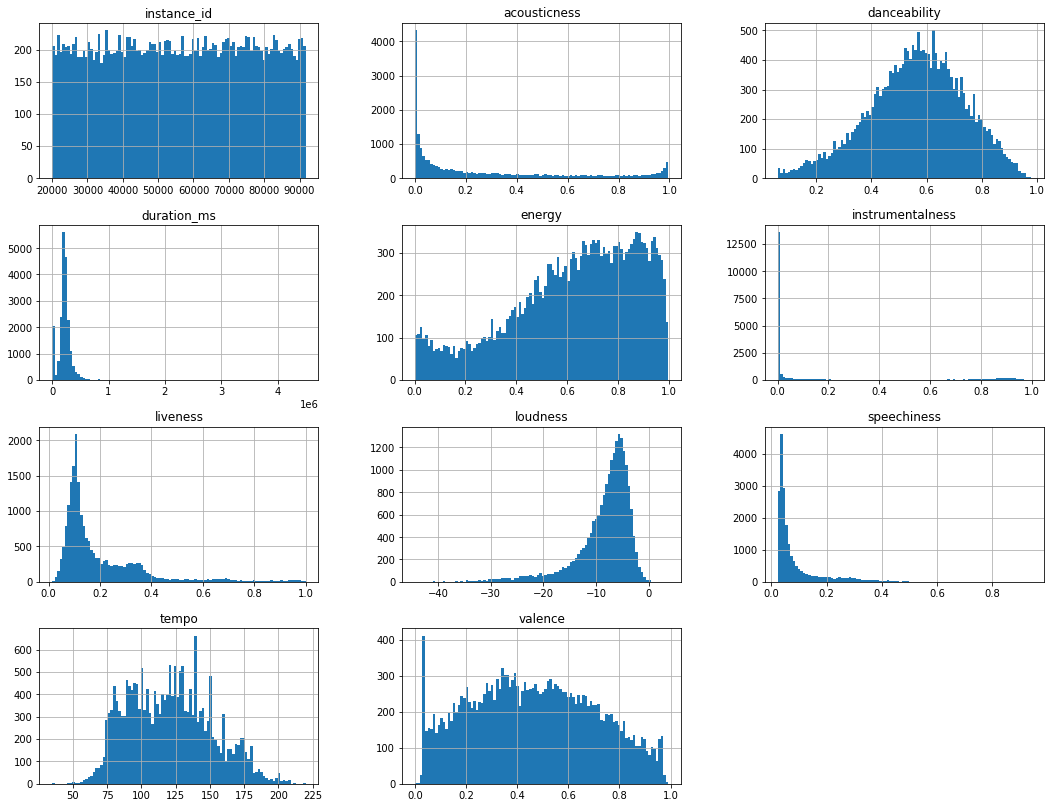

In [5]:
# смотрим столбцы с числовыми данными обучающего набора на графиках
display('Распределение числовых значений в обучающем наборе данных')
data_train.hist(bins=100,figsize=[18,14]);

'Распределение числовых значений в тестовом наборе данных'

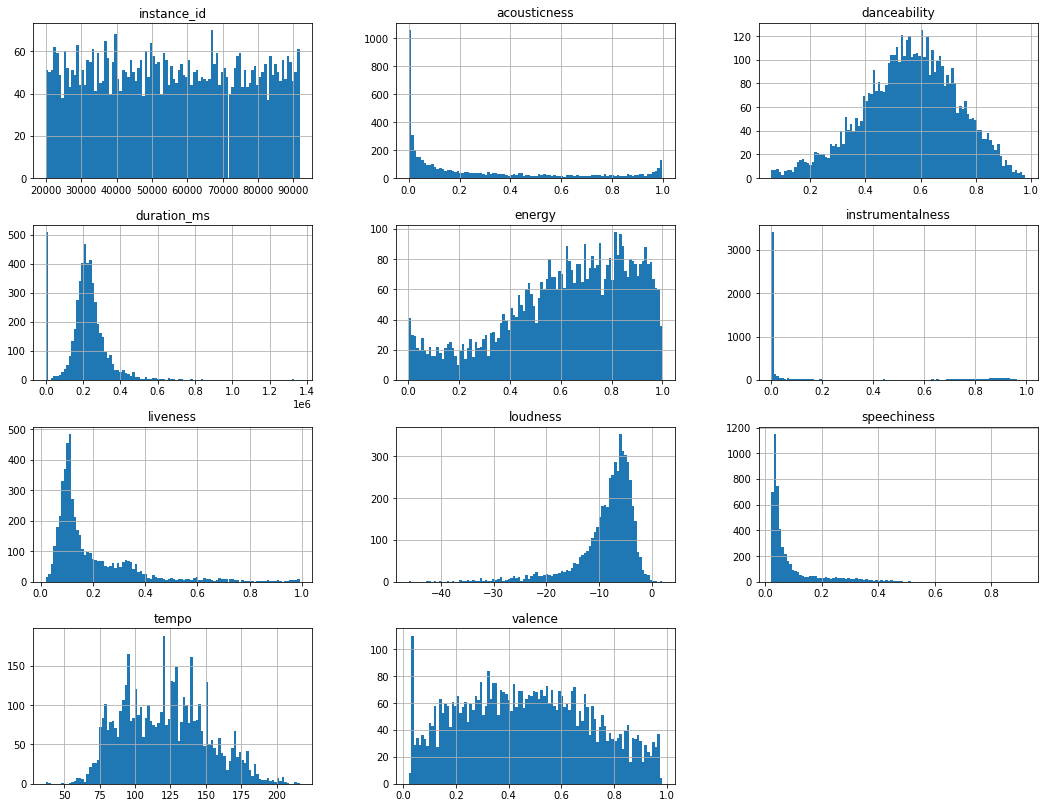

In [6]:
# смотрим столбцы с числовыми данными тестового набора на графиках
display('Распределение числовых значений в тестовом наборе данных')
data_test.hist(bins=100,figsize=[18,14]);

In [7]:
# проверяем, соответствует ли количество уникальных идентификаторов трека количеству строк 
print(data_train['instance_id'].nunique()/len(data_train['instance_id']))
data_test['instance_id'].nunique()/len(data_test['instance_id'])

1.0


1.0

### Вывод по первому шагу

- **Данне загружены и предварительно изучены**:
  
   - В данных присутствуют пропуски, явные дубликаты отсутствуют; 
   
   - Данные в нескольких столбцах 'track_name', 'key', 'mode', 'music_genre' вполне закономерно имеют строковый тип.

   - Данные в столбце с датой 'obtained_date' имеют тип (строковый) не соответствующий дате;
   
   - Данные, в основном распределены неравномерно, но в некоторых столбцах ('instrumentalness', 'speechiness', 'duration_ms') присутствуют выбросы; 
   
    - В столбце 'duration_ms' есть отрицательные значения, чего не может быть по логике, так как продолжительность не может быть меньше нуля; 

   - В тестовом и тренировочном наборах схожие особенности и распределение признаков.
   
- **Задачи для предобработки**:   
   
   - Найти и обоработать аномалии;
   
   - Обработаь пропуски;
   
   - Уменьшить размерность столбца 'duration_ms' для удобства отображения и обработки; 

   - Удалить малоинформативный столбец: 'obtained_date' (пока оставим столбцы 'track_name' и 'instance_id'  - они понадобятся для анализа, и, чтобы сформировать новый признак).

## Предобработка 

### Аномалии

In [8]:
# уменьшаем размерность duration_ms - переведем в секунды
data_train['duration_ms'] = data_train['duration_ms']/1000
data_test['duration_ms'] = data_test['duration_ms']/1000

In [9]:
# смотрим уникальные значения в столбцах с нечисловыми данными в обучающем наборе
columns = data_train.select_dtypes(include='object')
def values_unique(data):
    for column in columns:
        values = data[column].unique()
        print('Уникальные значения столбца:', column)
        print(values)
        print()
           
values_unique(data_train)

Уникальные значения столбца: track_name
['Highwayman' 'Toes Across The Floor' 'First Person on Earth' ...
 'Original Prankster' '4Peat' 'Trouble (feat. MC Spyder)']

Уникальные значения столбца: key
['D' 'A' 'E' 'G#' 'C' 'D#' 'A#' 'F' 'F#' nan 'G' 'C#' 'B']

Уникальные значения столбца: mode
['Major' 'Minor' nan]

Уникальные значения столбца: obtained_date
['4-Apr' '3-Apr' '5-Apr' '1-Apr']

Уникальные значения столбца: music_genre
['Country' 'Rock' 'Alternative' 'Hip-Hop' 'Blues' 'Jazz' 'Electronic'
 'Anime' 'Rap' 'Classical']



In [10]:
# смотрим уникальные значения в столбцах с числовыми данными с возможными аномалиями в обучающем наборе
columns = ['acousticness', 'duration_ms', 'instrumentalness']
def values_unique(data):
    for column in columns:
        values = data[column].value_counts(normalize=True).head()
        print('Распределение значений в столбце:', column)
        print(values)
        print()
           
values_unique(data_train)

Распределение значений в столбце: acousticness
0.994    0.003727
0.995    0.003727
0.991    0.002795
0.992    0.002697
0.993    0.002599
Name: acousticness, dtype: float64

Распределение значений в столбце: duration_ms
-0.001      0.098509
 192.000    0.000785
 240.000    0.000785
 180.000    0.000637
 182.400    0.000490
Name: duration_ms, dtype: float64

Распределение значений в столбце: instrumentalness
0.000    0.293125
0.905    0.001324
0.892    0.001275
0.898    0.001226
0.912    0.001226
Name: instrumentalness, dtype: float64



In [11]:
# смотрим распределение значений в столбце duration_ms в обучающем наборе
data_train['duration_ms'].describe()

count    20394.000000
mean       220.375425
std        126.728326
min         -0.001000
25%        177.517000
50%        219.533000
75%        266.000000
max       4497.994000
Name: duration_ms, dtype: float64

In [12]:
# смотрим уникальные значения в столбцах с нечисловыми данными в тестовом наборе
columns = data_test.select_dtypes(include='object')
values_unique(data_test)

Распределение значений в столбце: track_name
Sorry                         0.000588
Women                         0.000588
Better Days                   0.000588
Black Holes (Solid Ground)    0.000588
No Love                       0.000588
Name: track_name, dtype: float64

Распределение значений в столбце: key
D     0.112730
C     0.107266
G     0.106659
C#    0.100182
A     0.094111
Name: key, dtype: float64

Распределение значений в столбце: mode
Major    0.641818
Minor    0.358182
Name: mode, dtype: float64

Распределение значений в столбце: obtained_date
4-Apr    0.901549
3-Apr    0.077466
5-Apr    0.012748
1-Apr    0.008237
Name: obtained_date, dtype: float64



In [13]:
# смотрим уникальные значения в столбцах с числовыми данными с возможными аномалиями в тестовом наборе
values_unique(data_test)

Распределение значений в столбце: track_name
Sorry                         0.000588
Women                         0.000588
Better Days                   0.000588
Black Holes (Solid Ground)    0.000588
No Love                       0.000588
Name: track_name, dtype: float64

Распределение значений в столбце: key
D     0.112730
C     0.107266
G     0.106659
C#    0.100182
A     0.094111
Name: key, dtype: float64

Распределение значений в столбце: mode
Major    0.641818
Minor    0.358182
Name: mode, dtype: float64

Распределение значений в столбце: obtained_date
4-Apr    0.901549
3-Apr    0.077466
5-Apr    0.012748
1-Apr    0.008237
Name: obtained_date, dtype: float64



In [14]:
# смотрим распределение значений в столбце duration_ms в тестовом наборе
data_test['duration_ms'].describe()

count    5099.000000
mean      217.397408
std       115.637408
min        -0.001000
25%       173.733500
50%       217.500000
75%       264.247000
max      1360.027000
Name: duration_ms, dtype: float64

### Удаление лишних столбцов

In [15]:
# удаляем малоинформативный столбец 
df_train = data_train.drop(['obtained_date'], axis=1)
df_test = data_test.drop(['obtained_date'], axis=1)

# проверяем
df_train.info()
print()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20394 entries, 0 to 20393
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       20394 non-null  float64
 1   track_name        20394 non-null  object 
 2   acousticness      20394 non-null  float64
 3   danceability      20394 non-null  float64
 4   duration_ms       20394 non-null  float64
 5   energy            20394 non-null  float64
 6   instrumentalness  20394 non-null  float64
 7   key               19659 non-null  object 
 8   liveness          20394 non-null  float64
 9   loudness          20394 non-null  float64
 10  mode              19888 non-null  object 
 11  speechiness       20394 non-null  float64
 12  tempo             19952 non-null  float64
 13  valence           20394 non-null  float64
 14  music_genre       20394 non-null  object 
dtypes: float64(11), object(4)
memory usage: 2.3+ MB

<class 'pandas.core.frame.DataFrame'>


### Дубликаты

In [16]:
# выводим названия колонок
df_train.columns

Index(['instance_id', 'track_name', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'valence', 'music_genre'],
      dtype='object')

In [17]:
# выбираем колонки для поиска дубликатов
dup_col = df_train.columns[2:]

In [18]:
# ищем дубликаты в данных
df_train.duplicated(dup_col).sum()

7

In [19]:
# смотрим строки-дубликаты в тренировочном наборе 
df_train.loc[df_train.duplicated(dup_col, keep=False)].sort_values(by='acousticness')

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
4945,61145.0,Extreme Ways (Bourne's Legacy),0.000417,0.466,290.827,0.828,0.20500,B,0.335,-7.898,Minor,0.0518,104.495,0.299,Electronic
18071,23448.0,Extreme Ways (Bourne's Legacy) - Original Version,0.000417,0.466,290.827,0.828,0.20500,B,0.335,-7.898,Minor,0.0518,104.495,0.299,Electronic
12175,82029.0,TTU (Too Turnt Up) (feat. Waka Flocka Flame),0.003990,0.579,241.702,0.790,0.13500,NaN,0.101,-4.683,Minor,0.0468,144.998,0.233,Electronic
15429,78576.0,TTU (Too Turnt Up),0.003990,0.579,241.702,0.790,0.13500,NaN,0.101,-4.683,Minor,0.0468,144.998,0.233,Electronic
10089,21594.0,Forever - FuntCase Remix,0.013400,0.312,321.600,0.981,0.06190,F,0.289,-2.788,Minor,0.3800,149.600,0.043,Electronic
15954,22037.0,Forever - Funtcase Remix,0.013400,0.312,321.600,0.981,0.06190,F,0.289,-2.788,Minor,0.3800,149.600,0.043,Electronic
8332,27101.0,Back To The Future (feat. ProbCause),0.018600,0.583,180.000,0.841,0.00000,D,0.105,-3.665,Major,0.1900,90.646,0.495,Electronic
9890,68462.0,Back To The Future,0.018600,0.583,180.000,0.841,0.00000,D,0.105,-3.665,Major,0.1900,90.646,0.495,Electronic
9012,66646.0,Many Shades Of Black,0.019600,0.408,264.627,0.728,0.00000,G,0.462,-4.287,Minor,0.0340,95.438,0.632,Blues
18912,36123.0,Many Shades of Black,0.019600,0.408,264.627,0.728,0.00000,G,0.462,-4.287,Minor,0.0340,95.438,0.632,Blues


In [20]:
# удаляем дубликаты и сбрасываем индексы
df_train.drop_duplicates(dup_col, inplace=True, ignore_index=True)
# проверяем
df_train.duplicated(dup_col).sum()

0

### Пропуски

In [21]:
# смотрим абсолютное количество пропусков
print(df_train.isna().sum().sort_values())
print()
df_test.isna().sum().sort_values() 

instance_id           0
track_name            0
acousticness          0
danceability          0
duration_ms           0
energy                0
instrumentalness      0
liveness              0
loudness              0
speechiness           0
valence               0
music_genre           0
tempo               442
mode                506
key                 734
dtype: int64



instance_id           0
track_name            0
acousticness          0
danceability          0
duration_ms           0
energy                0
instrumentalness      0
liveness              0
loudness              0
speechiness           0
valence               0
tempo               121
mode                149
key                 158
dtype: int64

In [22]:
# смотрим относительное количество пропусков
print(df_train.isna().mean().sort_values())
print()
df_test.isna().mean().sort_values()

instance_id         0.000000
track_name          0.000000
acousticness        0.000000
danceability        0.000000
duration_ms         0.000000
energy              0.000000
instrumentalness    0.000000
liveness            0.000000
loudness            0.000000
speechiness         0.000000
valence             0.000000
music_genre         0.000000
tempo               0.021680
mode                0.024820
key                 0.036003
dtype: float64



instance_id         0.000000
track_name          0.000000
acousticness        0.000000
danceability        0.000000
duration_ms         0.000000
energy              0.000000
instrumentalness    0.000000
liveness            0.000000
loudness            0.000000
speechiness         0.000000
valence             0.000000
tempo               0.023730
mode                0.029221
key                 0.030986
dtype: float64

### Замена пропусков и аномалий

- Суммарно количество пропусков не превышает 10% в каждом датасете.

- Чтобы не допустить утечки данных при обработке пропусков и аномалий, и, одновременно, полноценно изучить данные, создадим копию тренировочного датасета, обработаем аномалии и пропуски и проанализируем данные. 


- Пропуски и аномалии в исходном датасете обработаем после разделения его на выборки. Заодно сразу удалим пропуски в тестовом датасете, также избегая утечки.
 
 
 - Для замены пропусков используем медиану: она менее чувствительна к выбросам. 

    - Чтобы заполнить пропуски в столбцах 'key', 'mode' и 'tempo' используем численное значение медианы столбца acousticness , сгруппированному по 'key' или 'mode' (значения имеют лучшее распределение и лучшую размерность по сравнению с другими), так мы получим лучшее распределение данных в результирующем датафрейме.

    - Для замены аномалий в столбце с продолжительностью трека 'duration_ms' используем медиану столбца, сгруппированного по столбцу 'key', чтобы получить лучшее распределение данных в результирующем датафрейме.  

#### Тренировочный набор

In [23]:
# создаем копию тренировочного датасета
train_copy = df_train.copy()

In [24]:
# смотрим закономерности в распределении значений по ключу key 
train_copy.groupby('key').median()

,instance_id,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
key,,,,,,,,,,,
A,57018.0,0.13800,0.5640,221.3780,0.6620,0.000306,0.127,-7.309,0.04600,120.0750,0.489
A#,56383.0,0.13500,0.5890,221.0270,0.6560,0.000164,0.130,-7.184,0.05120,116.1825,0.462
B,55631.0,0.07620,0.5910,219.2000,0.7040,0.000105,0.138,-6.632,0.05430,120.1300,0.455
C,55135.0,0.15600,0.5570,220.9860,0.6370,0.000293,0.127,-7.363,0.04300,119.9895,0.450
C#,55301.0,0.07680,0.6190,215.4400,0.6910,0.000035,0.124,-6.462,0.06600,121.1370,0.445
D,55950.0,0.11000,0.5540,217.9600,0.6770,0.000206,0.134,-7.160,0.04770,120.8190,0.464
D#,56761.0,0.22350,0.5355,219.4135,0.6155,0.000101,0.124,-7.291,0.04365,120.0015,0.418
E,55475.5,0.13300,0.5510,220.2325,0.6650,0.000341,0.133,-7.155,0.04700,119.9995,0.436
F,56164.0,0.16800,0.5690,220.8080,0.6340,0.000218,0.132,-7.451,0.04740,120.0100,0.453


In [25]:
# смотрим распределение медианы acousticness по key
train_copy.groupby('key')['acousticness'].median().sort_values()

key
B     0.07620
C#    0.07680
F#    0.09545
D     0.11000
G#    0.12100
G     0.12500
E     0.13300
A#    0.13500
A     0.13800
C     0.15600
F     0.16800
D#    0.22350
Name: acousticness, dtype: float64

In [26]:
# меняем пропуски в столбце key в тренировочном наборе
# на численное значение медианы столбца acousticness
for d in train_copy['key'].unique():
    
    train_copy.loc[train_copy['key'
                         ].isna(), 'key'
                ] = train_copy.loc[train_copy['key'] == d, 'acousticness'].median()
# проверяем
print(train_copy['key'].isna().sum())
train_copy.groupby('key')['acousticness'].median().sort_values()

0


key
B       0.07620
C#      0.07680
F#      0.09545
D       0.11000
G#      0.12100
0.11    0.12300
G       0.12500
E       0.13300
A#      0.13500
A       0.13800
C       0.15600
F       0.16800
D#      0.22350
Name: acousticness, dtype: float64

In [27]:
# меняем численное значение медианы на соответствующее буквенное 
train_copy.loc[train_copy['key'] == 0.11, 'key'] = 'D' 

# проверяем
print(train_copy['key'].isna().sum())
train_copy.groupby('key')['acousticness'].median().sort_values()

0


key
B     0.07620
C#    0.07680
F#    0.09545
D     0.11400
G#    0.12100
G     0.12500
E     0.13300
A#    0.13500
A     0.13800
C     0.15600
F     0.16800
D#    0.22350
Name: acousticness, dtype: float64

In [28]:
# проверяем распределение значений в столбце key 
train_copy['key'].value_counts(normalize=True)

D     0.139452
G     0.112964
C     0.105410
C#    0.104233
A     0.098739
F     0.079217
B     0.074606
E     0.074361
G#    0.062147
A#    0.059989
F#    0.059155
D#    0.029725
Name: key, dtype: float64

In [29]:
# смотрим строки с пропусками в столбце tempo
train_copy[train_copy['tempo'].isna()].head()

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
63,45966.0,Back Door Man,0.287000,0.476,212.427,0.612,0.000252,A,0.0877,-7.010,Major,0.0335,NaN,0.909,Rock
85,90217.0,familia,0.000059,0.489,269.000,0.947,0.000000,C#,0.1130,-3.925,Minor,0.0419,NaN,0.517,Anime
114,79170.0,Poor Johnny,0.348000,0.698,362.267,0.800,0.000087,B,0.4430,-3.091,Minor,0.0284,NaN,0.654,Blues
138,39716.0,Set Free (feat. Yael),0.008340,0.776,191.210,0.783,0.044900,C,0.0377,-3.595,Major,0.0374,NaN,0.943,Electronic
145,48590.0,Running Away,0.001100,0.608,178.440,0.801,0.000008,A,0.2230,-5.452,Minor,0.0376,NaN,0.544,Alternative


In [30]:
# смотрим распределение значений в столбце tempo
train_copy['tempo'].describe()

count    19945.000000
mean       120.944142
std         30.429711
min         34.765000
25%         95.922000
50%        120.013000
75%        141.966000
max        220.041000
Name: tempo, dtype: float64

In [31]:
#меняем пропуски в столбце tempo 
#проверяем до
print(train_copy['tempo'].isna().sum())
print(train_copy['tempo'].describe())
print()

#меняем пропуски в столбце tempo на медиану группы по столбцу key
name = 'tempo'
train_copy[name] = np.where(train_copy[name].isna(),
                 train_copy['key'].map(train_copy.groupby('key')[name].median()), 
                 train_copy[name])

#проверяем после
print(train_copy['tempo'].isna().sum())
print(train_copy['tempo'].describe())

442
count    19945.000000
mean       120.944142
std         30.429711
min         34.765000
25%         95.922000
50%        120.013000
75%        141.966000
max        220.041000
Name: tempo, dtype: float64

0
count    20387.000000
mean       120.928246
std         30.098833
min         34.765000
25%         96.029000
50%        120.012000
75%        140.973000
max        220.041000
Name: tempo, dtype: float64


In [32]:
# смотрим закономерности в распределении значений по ключу mode 
train_copy.groupby('mode').median()

,instance_id,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
mode,,,,,,,,,,,
Major,55939.0,0.128,0.5615,218.000,0.665,0.000095,0.130,-7.0825,0.0461,120.0235,0.468
Minor,56253.0,0.108,0.5880,222.408,0.667,0.000362,0.129,-7.0010,0.0557,120.0015,0.438


In [33]:
# меняем пропуски в столбце mode
# на численное значение медианы 
for d in train_copy['mode'].unique():
    
    train_copy.loc[train_copy['mode'
                         ].isna(), 'mode'
                ] = train_copy.loc[train_copy['mode'] == d, 'acousticness'].median()
# проверяем
print(train_copy['mode'].isna().sum())
train_copy.groupby('mode')['acousticness'].median().sort_values()

0


mode
Minor    0.108
0.128    0.110
Major    0.128
Name: acousticness, dtype: float64

In [34]:
# меняем численное значение медианы на соответствующее буквенное 
train_copy.loc[train_copy['mode'] == 0.128, 'mode'] = 'Major' 

# проверяем
print(train_copy['mode'].isna().sum())
train_copy.groupby('mode')['acousticness'].median().sort_values()

0


mode
Minor    0.108
Major    0.127
Name: acousticness, dtype: float64

In [35]:
# проверяем распределение значений в столбце mode
train_copy['mode'].value_counts(normalize=True)

Major    0.653946
Minor    0.346054
Name: mode, dtype: float64

In [36]:
# проверяем пропуски
train_copy.isna().sum()

instance_id         0
track_name          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
valence             0
music_genre         0
dtype: int64

In [37]:
# меняем аномальное значение в столбце duration_ms
# проверяем до
print(train_copy['duration_ms'].describe())
print()

# меняем аномальное значение в столбце duration_ms на медиану группы по столбцу key
name = 'duration_ms'
train_copy[name] = np.where(train_copy[name]== -0.001,
                 train_copy['key'].map(train_copy.groupby('key')[name].median()), 
                 train_copy[name])
# проверяем после
print(train_copy['duration_ms'].describe())

count    20387.000000
mean       220.367007
std        126.746157
min         -0.001000
25%        177.503500
50%        219.533000
75%        266.000000
max       4497.994000
Name: duration_ms, dtype: float64

count    20387.000000
mean       241.998647
std        103.978224
min         15.509000
25%        196.090500
50%        221.378000
75%        266.000000
max       4497.994000
Name: duration_ms, dtype: float64


#### Тестовый набор

In [38]:
# меняем пропуски в столбце key в тестовом наборе, избегая утечки данных
# на численное значение медианы 
for d in df_test['key'].unique():
    
    df_test.loc[df_test['key'
                         ].isna(), 'key'
                ] = df_train.loc[df_train['key'] == d, 'acousticness'].median()
# проверяем
print(df_test['key'].isna().sum())
df_test.groupby('key')['acousticness'].median().sort_values()

0


key
C#       0.0601
B        0.0746
F#       0.1050
0.135    0.1090
A        0.1140
G#       0.1195
D        0.1230
E        0.1270
G        0.1390
A#       0.1490
C        0.1750
F        0.1900
D#       0.2335
Name: acousticness, dtype: float64

In [39]:
# меняем численое значение медианы на соответствующее буквенное 
df_test.loc[df_test['key'] == 0.135, 'key'] = 'G' 

# проверяем
print(df_test['key'].isna().sum())
df_test.groupby('key')['acousticness'].median().sort_values()

0


key
C#    0.0601
B     0.0746
F#    0.1050
A     0.1140
G#    0.1195
D     0.1230
E     0.1270
G     0.1330
A#    0.1490
C     0.1750
F     0.1900
D#    0.2335
Name: acousticness, dtype: float64

In [40]:
# проверяем распределение значений в столбце key 
df_test['key'].value_counts(normalize=True)

G     0.134340
D     0.109237
C     0.103942
C#    0.097078
A     0.091194
F     0.090998
B     0.077858
A#    0.069425
E     0.068445
F#    0.065307
G#    0.061581
D#    0.030594
Name: key, dtype: float64

In [41]:
# смотрим строки с пропусками в столбце tempo
df_test[df_test['tempo'].isna()].head()

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
101,79753,She Walks In Beauty,0.98100,0.174,287.360,0.0289,0.829000,G,0.0817,-25.038,Major,0.0391,NaN,0.0315
131,27331,Tell Me Why,0.09840,0.611,142.013,0.4490,0.000000,D,0.2260,-8.938,Minor,0.2940,NaN,0.2240
172,34855,Like You,0.38300,0.616,184.033,0.4090,0.000000,C#,0.1400,-8.427,Major,0.2980,NaN,0.4530
212,43840,Matador (feat. Thompson Square),0.00360,0.528,241.293,0.8250,0.000002,B,0.3690,-4.740,Minor,0.0602,NaN,0.4090
343,79286,New Fang,0.00001,0.276,228.640,0.9620,0.000366,B,0.0327,-3.797,Minor,0.0629,NaN,0.7410


In [42]:
# смотрим распределение значений в столбце tempo
df_test['tempo'].describe()

count    4978.000000
mean      121.246463
std        29.875950
min        37.114000
25%        96.070250
50%       120.053500
75%       141.934250
max       216.029000
Name: tempo, dtype: float64

In [43]:
# меняем пропуски в столбце tempo, избегая утечки данных
# проверяем до
print(df_test['tempo'].isna().sum())
print(df_test['tempo'].describe())
print()

# меняем пропуски в столбце tempo на медиану группы по столбцу key
name = 'tempo'
df_test[name] = np.where(df_test[name].isna(),
                 df_test['key'].map(df_train.groupby('key')[name].median()), 
                 df_test[name])

# проверяем после
print(df_test['tempo'].isna().sum())
print(df_test['tempo'].describe())

121
count    4978.000000
mean      121.246463
std        29.875950
min        37.114000
25%        96.070250
50%       120.053500
75%       141.934250
max       216.029000
Name: tempo, dtype: float64

0
count    5099.000000
mean      121.223860
std        29.520696
min        37.114000
25%        96.732500
50%       120.039000
75%       141.002500
max       216.029000
Name: tempo, dtype: float64


In [44]:
# меняем пропуски в столбце mode
# на численное значение медианы 
for d in df_test['mode'].unique():
    
    df_test.loc[df_test['mode'
                         ].isna(), 'mode'
                ] = df_train.loc[df_train['mode'] == d, 'acousticness'].median()
# проверяем
print(df_test['mode'].isna().sum())
df_test.groupby('mode')['acousticness'].median().sort_values()

0


mode
0.108    0.109
Minor    0.114
Major    0.124
Name: acousticness, dtype: float64

In [45]:
# меняем численное значение медианы на соответствующее буквенное 
df_test.loc[df_test['mode'] == 0.108, 'mode'] = 'Minor' 

# проверяем
print(df_test['mode'].isna().sum())
df_test.groupby('mode')['acousticness'].median().sort_values()

0


mode
Minor    0.113
Major    0.124
Name: acousticness, dtype: float64

In [46]:
# проверяем распределение значений в столбце mode
df_test['mode'].value_counts(normalize=True)

Major    0.623063
Minor    0.376937
Name: mode, dtype: float64

In [47]:
# проверяем пропуски
df_test.isna().sum()

instance_id         0
track_name          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
valence             0
dtype: int64

In [48]:
# меняем аномальное значение в столбце duration_ms, избегая утечки данных
# проверяем до
print(df_test['duration_ms'].describe())
print()

# меняем аномальное значение в столбце duration_ms на медиану группы по столбцу key
name = 'duration_ms'
df_test[name] = np.where(df_test[name]== -0.001,
                 df_test['key'].map(df_train.groupby('key')[name].median()), 
                 df_test[name])

# проверяем после
print(df_test['duration_ms'].describe())

count    5099.000000
mean      217.397408
std       115.637408
min        -0.001000
25%       173.733500
50%       217.500000
75%       264.247000
max      1360.027000
Name: duration_ms, dtype: float64

count    5099.000000
mean      239.307514
std        90.410039
min        22.750000
25%       194.428500
50%       221.027000
75%       264.247000
max      1360.027000
Name: duration_ms, dtype: float64


### Вывод по второму шагу

 - Изучили уникальные значения, пропуски, дубликаты и аномалии  в данных: 
 
 
    - Удалили дубликаты в тренировочном наборе;
    
    - Удалили малоинформативный столбец 'obtained_date' с датой загрузки трека;
    
    - Удалили пропуски в тестовом наборе, избегая утечки данных;
 
    - Обнаружили и обработали внушительное по доле аномальное значение (-0,001) в столбце 'duration_ms' с продолжительностью трека;
    
    - Обнаружили большое количество нулевых значений в столбце 'instrumentalness', что свидетельствует о том, что более 20% треков содержат вокал;
    
    - Обратили внимание на выбросы в некоторых столбцах.
 
 
 - Создали копию тренировочного датафрейма в котором удалили аномалии и пропуски для последующего анализа данных. 

## Анализ данных

### Тренировочный набор

In [49]:
# добавляем новый столбец - длину названия трека
train_copy['track_name_len'] = train_copy['track_name'].str.len()

'Распределение числовых значений в обучающем наборе данных'

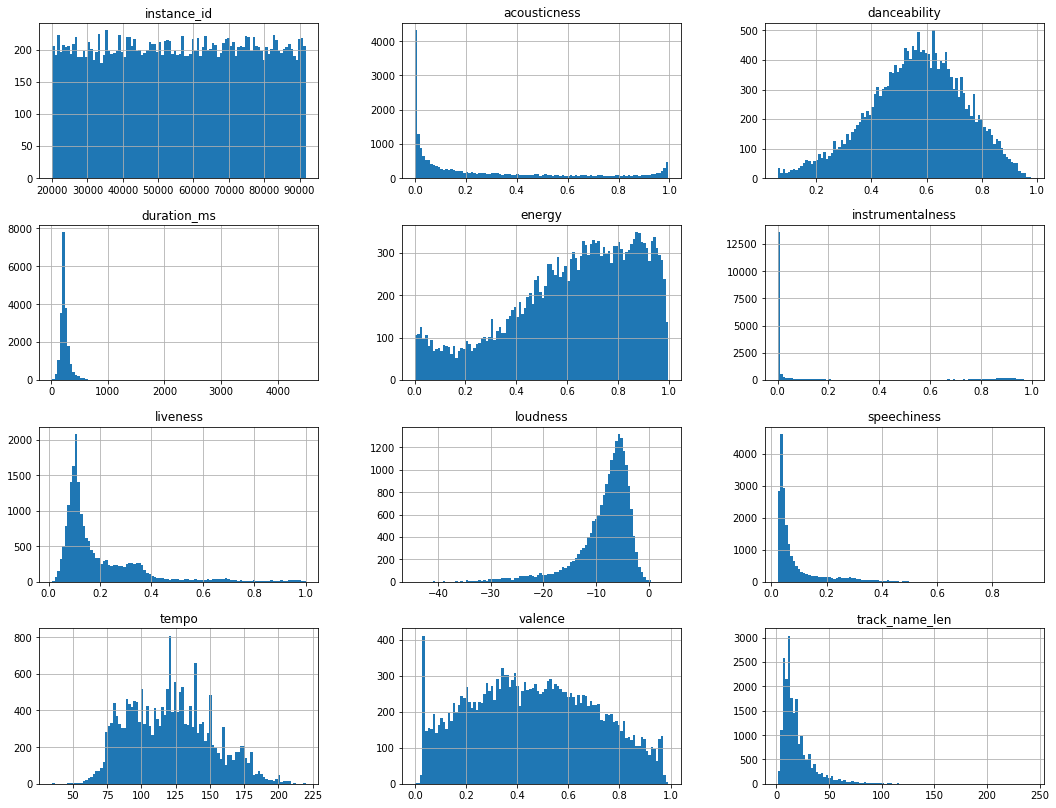

In [50]:
# изучаем столбцы с числовыми данными обучающего набора на графиках
display('Распределение числовых значений в обучающем наборе данных')
train_copy.hist(bins=100,figsize=[18,14]);

In [51]:
# смотрим распределение треков по жанрам
train_copy['music_genre'].value_counts(normalize=True)

Blues          0.140138
Alternative    0.127581
Electronic     0.125521
Rap            0.119046
Rock           0.106195
Country        0.103988
Anime          0.093246
Classical      0.067347
Jazz           0.060774
Hip-Hop        0.056163
Name: music_genre, dtype: float64

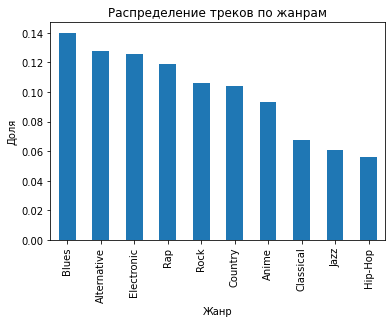

In [52]:
# смотрим распределение треков по жанрам на графике
train_copy['music_genre'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Жанр')
plt.ylabel('Доля')
plt.title('Распределение треков по жанрам')
plt.show() 

In [53]:
# смотрим распределение значений в числовых признаках
train_copy.describe()

,instance_id,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,track_name_len
count,20387.000000,20387.000000,20387.000000,20387.000000,20387.000000,20387.000000,20387.000000,20387.000000,20387.000000,20387.000000,20387.000000,20387.000000
mean,55977.062491,0.274863,0.561998,241.998647,0.625220,0.160024,0.198519,-8.554052,0.091341,120.928246,0.464612,19.314465
std,20695.015390,0.321668,0.171909,103.978224,0.251256,0.306546,0.166752,5.500415,0.097726,30.098833,0.243393,15.619273
min,20011.000000,0.000000,0.060000,15.509000,0.001010,0.000000,0.013600,-44.406000,0.022300,34.765000,0.000000,1.000000
25%,38168.000000,0.015200,0.451000,196.090500,0.470000,0.000000,0.097300,-10.258000,0.035600,96.029000,0.272000,10.000000
50%,56032.000000,0.120000,0.570000,221.378000,0.666000,0.000144,0.130000,-7.053000,0.049000,120.012000,0.457000,15.000000
75%,73915.500000,0.470500,0.683000,266.000000,0.830000,0.084450,0.252500,-5.054000,0.095400,140.973000,0.653000,23.000000
max,91758.000000,0.996000,0.978000,4497.994000,0.999000,0.996000,1.000000,3.744000,0.942000,220.041000,0.992000,242.000000


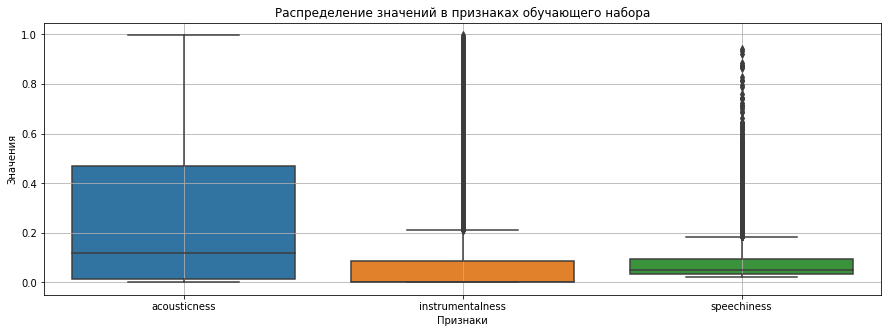

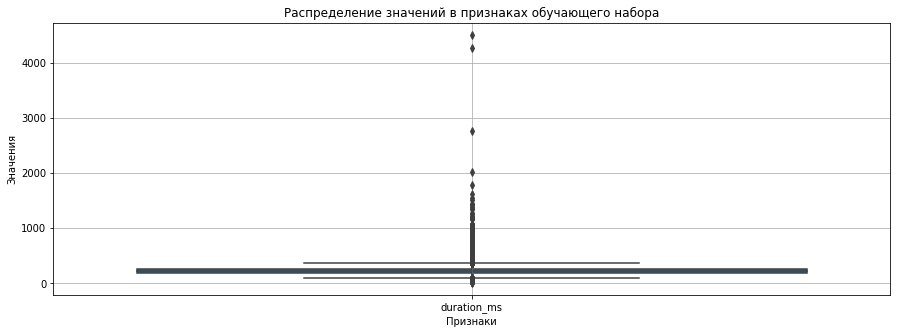

In [54]:
# создаем функцию для построения диаграмм разброса для признаков с выбросами
def boxplotly(data, xlabel, ylabel, title):
    
    plt.figure(figsize=(15, 5))    
    sns.boxplot(data=data)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    plt.title(title)
    plt.show()   

# смотрим разброс в признаках с выбросами в тренировочном наборе     
columns = ['acousticness','instrumentalness','speechiness']
boxplotly(train_copy[columns], 'Признаки', 'Значения', 'Распределение значений в признаках обучающего набора')
columns = ['duration_ms']
boxplotly(train_copy[columns], 'Признаки', 'Значения', 'Распределение значений в признаках обучающего набора')

- Данные, в основном распределены неравномерно, но в некоторых столбцах ('instrumentalness', 'speechiness', 'duration_ms') присутствуют выбросы. 


- В столбце 'instrumentalness' большое количество нулевых значений, что свидетельствует о том, что много треков содержат вокал.


- Треки по  жанрам распределены неравномерно. Больше всего треков в жанре 'Blues', меньше всего в стиле 'Hip-Hop'. Но, в целом, дисбаланс не критический. 


- В основном, признаки одного масштаба, за исключением значений в столбцах 'duration_ms', 'loudness', 'tempo', которые имеют больший масштаб;



- Наибольшим и внушительным стандартным отклонением обладают значения в столбцах и 'duration_ms' и 'tempo'. Наименьшим - 'danceability'.


- Больше всего выбросов в столбцах 'acousticness', 'instrumentalness', 'speechiness'.

In [55]:
# смотрим распределение треков с продолжительностью свыше 1200с (20 минут) по жанрам
df_long_duration = train_copy[train_copy['duration_ms']>1200].sort_values(by='duration_ms')
df_long_duration.groupby('music_genre')['duration_ms'].count()

music_genre
Blues          3
Classical     10
Electronic     3
Jazz           1
Name: duration_ms, dtype: int64

In [56]:
# смотрим распределение среднего числовых значений по жанрам
train_copy.groupby('music_genre').mean().round(3)

,instance_id,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,track_name_len
music_genre,,,,,,,,,,,,
Alternative,55889.054,0.167,0.547,231.616,0.710,0.062,0.198,-6.561,0.090,122.893,0.449,14.782
Anime,55592.122,0.269,0.471,230.035,0.675,0.269,0.195,-7.787,0.065,126.522,0.436,15.292
Blues,55960.640,0.314,0.527,249.738,0.614,0.091,0.237,-8.958,0.061,121.332,0.578,20.169
Classical,56364.104,0.877,0.304,306.096,0.175,0.597,0.168,-21.596,0.053,103.600,0.208,47.602
Country,56271.026,0.275,0.579,217.473,0.636,0.005,0.184,-7.325,0.050,123.153,0.540,18.640
Electronic,56490.306,0.121,0.619,265.342,0.738,0.349,0.208,-7.002,0.099,126.301,0.389,17.338
Hip-Hop,56077.266,0.182,0.719,216.753,0.645,0.010,0.200,-6.844,0.209,120.437,0.474,16.279
Jazz,56268.140,0.500,0.582,263.796,0.472,0.365,0.173,-11.334,0.071,111.599,0.503,17.906
Rap,55375.118,0.169,0.700,218.934,0.652,0.008,0.197,-6.650,0.187,119.870,0.457,16.528


In [57]:
# создаем цикл для создания сводной таблицы с наиболее часто встречающимися значениями признаков 
# в каждом жанре 
# выбираем колонки
df_columns = ['track_name', 'acousticness', 'danceability',
              'duration_ms', 'energy', 'instrumentalness', 
              'key', 'liveness', 'loudness', 'mode', 
              'speechiness', 'tempo', 'valence', 'track_name_len'
             ]
rows=[]
for i in df_columns:
    # создаем сводную таблицу
    df_join = train_copy.pivot_table(
    index='music_genre',
    columns=i,
    values='instance_id',
    aggfunc=('count'))        
    df_idxmax = df_join.idxmax(axis=1)    
    rows.append(df_idxmax) # формируем список для объеднения 
    
# объединяем таблицы 
df_join_concat = pd.concat(rows, axis=1, keys=['track_name',
                                        'acousticness',
                                        'danceability',
                                        'duration_ms',
                                        'energy',
                                        'instrumentalness',
                                        'key',
                                        'liveness',
                                        'loudness',
                                        'mode',       
                                        'speechiness',
                                        'tempo',
                                        'valence', 
                                        'track_name_len']
                          )
# выводим итоговую таблицу
df_join_concat    

,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,track_name_len
music_genre,,,,,,,,,,,,,,
Alternative,Blue,0.00105,0.529,217.600,0.859,0.0,D,0.110,-4.159,Major,0.0332,119.9995,0.4240,10
Anime,Boys & Girls,0.99000,0.435,217.600,0.947,0.0,D,0.110,-4.587,Major,0.0332,119.6030,0.3320,6
Blues,Sweet Home Chicago,0.14400,0.591,217.600,0.613,0.0,D,0.108,-5.016,Major,0.0336,120.0750,0.3380,14
Classical,I. Allegro,0.99500,0.388,217.600,0.104,0.0,D,0.103,-14.916,Major,0.0384,119.9450,0.0368,54
Country,In My Head,0.10800,0.554,222.267,0.722,0.0,D,0.110,-8.669,Major,0.0297,119.9450,0.3620,13
Electronic,On My Own,0.14900,0.555,217.600,0.938,0.0,C#,0.101,-9.759,Major,0.0398,121.1370,0.1350,8
Hip-Hop,Blessings,0.19400,0.758,215.440,0.557,0.0,C#,0.107,-6.711,Major,0.1650,116.1825,0.3240,9
Jazz,Afro Blue,0.83500,0.532,217.600,0.471,0.0,D,0.108,-9.150,Major,0.0329,120.0750,0.9610,10
Rap,Save Me,0.12900,0.856,215.440,0.579,0.0,C#,0.111,-6.442,Major,0.2710,123.9680,0.5840,8


In [58]:
# создаем цикл для создания сводной таблицы с наиболее редко встречающимися значениями 
# признаков в каждом жанре 
# выбираем колонки
df_columns = ['track_name', 'acousticness', 'danceability',
              'duration_ms', 'energy', 'instrumentalness', 
              'key', 'liveness', 'loudness', 'mode', 
              'speechiness', 'tempo', 'valence', 'track_name_len'
             ]
rows=[]
for i in df_columns:
    # создаем сводную таблицу
    df_join = train_copy.pivot_table(
    index='music_genre',
    columns=i,
    values='instance_id',
    aggfunc=('count'))        
    df_idxmax = df_join.idxmin(axis=1)    
    rows.append(df_idxmax) # формируем список для объеднения 
    
# объединяем таблицы 
df_join_concat = pd.concat(rows, axis=1, keys=['track_name',
                                        'acousticness',
                                        'danceability',
                                        'duration_ms',
                                        'energy',
                                        'instrumentalness',
                                        'key',
                                        'liveness',
                                        'loudness',
                                        'mode',
                                        'speechiness',
                                        'tempo',
                                        'valence',
                                        'track_name_len']
                          )
# выводим итоговую таблицу
df_join_concat

,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,track_name_len
music_genre,,,,,,,,,,,,,,
Alternative,"""99""",0.000001,0.1030,34.750,0.05560,0.000001,D#,0.0212,-20.741,Minor,0.0233,51.316,0.0342,40
Anime,"""DEVILS NEVER CRY""(スタッフロール)",0.000000,0.0606,30.027,0.00243,0.000001,D#,0.0169,-38.833,Minor,0.0229,47.704,0.0252,50
Blues,$20 Fine,0.000002,0.1180,30.097,0.00957,0.000001,D#,0.0136,-30.800,Minor,0.0231,47.587,0.0315,61
Classical,"""Christen, ätzet diesen Tag"", BWV 63: I. Chora...",0.000005,0.0600,15.509,0.00101,0.000001,F#,0.0365,-44.406,Minor,0.0244,34.856,0.0000,103
Country,$50 Dollars and a Flask of Crown,0.000108,0.2030,92.400,0.04270,0.000001,D#,0.0212,-27.119,Minor,0.0223,58.095,0.0594,1
Electronic,#15,0.000003,0.0822,34.459,0.02110,0.000001,D#,0.0194,-24.798,Minor,0.0234,54.951,0.0276,1
Hip-Hop,(562) 453-9382 - Skit,0.000087,0.2840,33.093,0.19600,0.000001,D#,0.0278,-25.602,Minor,0.0260,47.917,0.0375,1
Jazz,"""It’s A Good Day""",0.000008,0.0644,50.385,0.01410,0.000001,D#,0.0310,-29.709,Minor,0.0230,34.765,0.0289,43
Rap,$ave Dat Money (feat. Fetty Wap & Rich Homie Q...,0.000007,0.1970,59.118,0.07930,0.000001,D#,0.0241,-22.589,Minor,0.0229,47.811,0.0336,1


-  Обращает на себя внимание множество повторяющихся значений в колонках с базовой нотой и модальностью ('key' и 'mode').



- Остальные значения распределены по жанрам плотными перекрывающимися диапазонами, особенно, значения в столбцах 'liveness' и 'tempo', что, вероятно, отразится на работе моделей.



- Наибольший разброс значений по жанрам демонстрируют признаки: 'acousticness', 'instrumentalness', 'speechiness', 'energy' и 'valence'. 


In [59]:
# создаем функцию построения графиков распределения числовых признаков по жанрам 
def plotly_num(data, values, ylim, ylabel, title):
    (data
    .pivot_table(index='music_genre', 
                 values=values
                 #aggfunc='mean'
                ).sort_values(by=values, 
                              ascending=False
    ).plot(
        kind='bar',
        xlim=(0,27), 
        ylim=(ylim), 
        grid=True,
        legend=False))

    plt.xlabel('Жанр')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show() 

'Распределение усредненных числовых характеристик треков по жанрам'

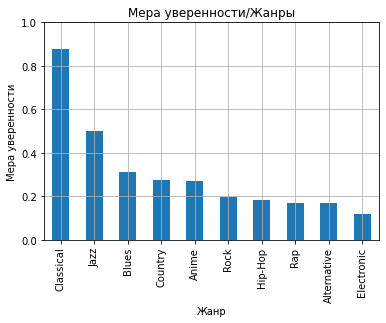

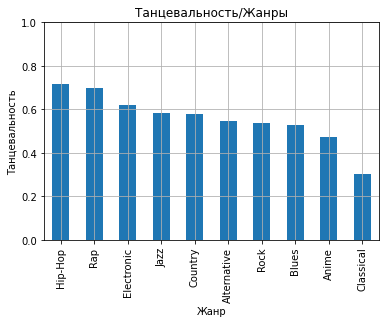

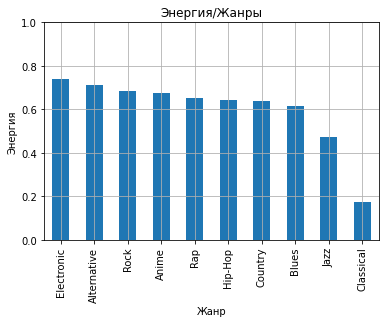

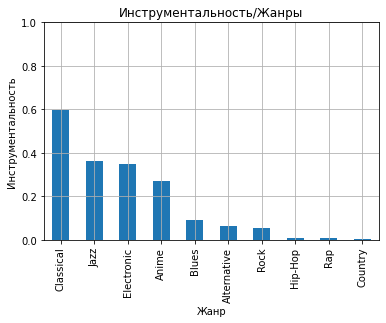

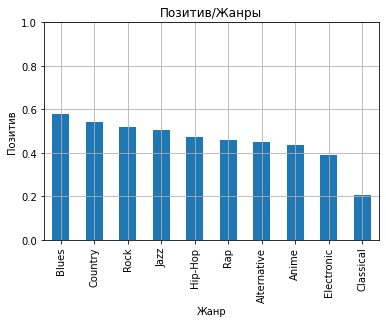

In [60]:
# строим графики распределения числовых характеристик треков по жанрам
display('Распределение усредненных числовых характеристик треков по жанрам')
plotly_num(train_copy,    
       'acousticness',(0,1),      
       'Мера уверенности',    
       'Мера уверенности/Жанры'
          )
plotly_num(train_copy,    
       'danceability',(0,1),      
       'Танцевальность',    
       'Танцевальность/Жанры'
          )
plotly_num(train_copy,    
       'energy',(0,1),       
       'Энергия',    
       'Энергия/Жанры'
          )
plotly_num(train_copy,    
       'instrumentalness',(0,1),      
       'Инструментальность',    
       'Инструментальность/Жанры'
          )
plotly_num(train_copy,    
       'valence',(0, 1),
       'Позитив',    
       'Позитив/Жанры')

- При распределении признаков по жанрам, треки в стиле **'Classical'** демонстрируют наиболее крайние характеристики среди других жанров: **наименьший позитив, энергию и танцевальность**, и **наибольшую инструментальность и меру уверенности**. 

- Треки в жанре **'Electronic'**, напротив, обладают **наибольшей энергией** и **наименьшей мерой уверенности, инструментальностью**, **танцевальностью выше среднего**, и **низким позитивом**.  


- Музыка **'Country'** обладает **самым низким** из всех жанров **уровнем инструментальности**, **высоким позитивом**, и **средним уровнем танцевальности, энергичности и меры уверенности**.    


- Треки в жаре **'Rock'** демонстрируют диаметрально противоположные **уровни позитива и инструментальности: высокий и низкий**, соответственно, и **средний уровень** остальных характеристик: **энергии, танцевальности, меры уверенности**. 


- **'Alternative'** - это **низкий уровень инструментальности** и **меры уверенности**, **высокий** уровень **энергичности** и **средний** уровень **позитива** и **танцевальности**. 


- У треков в жанре **'Anime'** **средний уровень позитива, инструментальности, энергии и меры уверенности**, и **низкий показатель танцевальности**. Музыка в этом жанре  обладает **наиболее усредненными характеристиками**.  


- Треки в стиле **'Jazz'** обладают **высокой мерой уверенности и уровнем инструментальности** и **низким** показателем **энергии**, остальные характеристики - средние. 


- **'Rap'** и **'Hip-Hop'** имеют **схожие характеристики** и отличаются **низкими значениями инструментальности** и **меры уверенности**, **средним уровнем позитива** и **энергии** и высоким (**наибольшим из всех**) **уровнем танцевальности**. **Характеристики  жанров сложно различимы**, что, вероятно, скажется на предсказаниях.   
 

- **'Blues'** обладает **наибольшим** из всех жанров **позитивом**, **низким уровнем инструментальности** и **средним уровнем танцевальности, энергии и меры уверенности**. 


'Распределение усредненных числовых характеристик треков по жанрам'

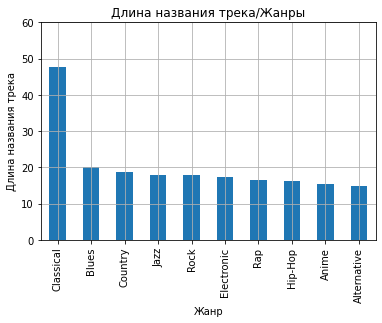

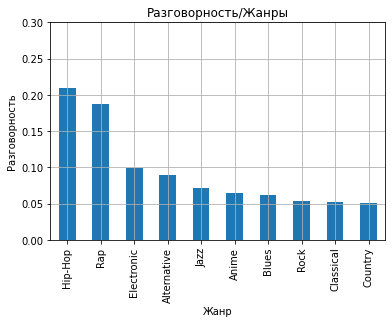

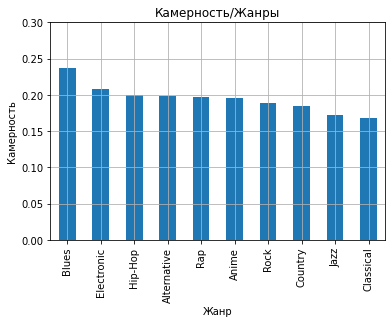

In [61]:
# строим графики распределения числовых характеристик треков по жанрам
display('Распределение усредненных числовых характеристик треков по жанрам')
plotly_num(train_copy,    
       'track_name_len',(0,60),      
       'Длина названия трека',    
       'Длина названия трека/Жанры'
          )
plotly_num(train_copy,    
       'speechiness',(0,0.3),
       'Разговорность',    
       'Разговорность/Жанры')
plotly_num(train_copy,    
       'liveness',(0,0.3),    
       'Камерность',    
       'Камерность/Жанры'
          )

- По **длине названия трека** наибольшими значениями отличаются треки в жанре **'Classical'**. Наименьшими - в жанре **'Alternative'**. В других  жанрах этот показатель у всех примерно одинаковый. 


- Обращает на себя внимание, что **'Rap'** и **'Hip-Hop'** обладают **различными** **уровнями камерности**, и схожими, предсказуемо, **наибольшими** среди всех жанров **уровнями разговорности**. 

- Характеристики **остальных жанров** по этим **показателям средние**. 

'Распределение усредненных числовых характеристик треков по жанрам'

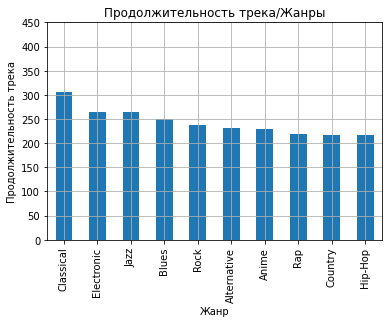

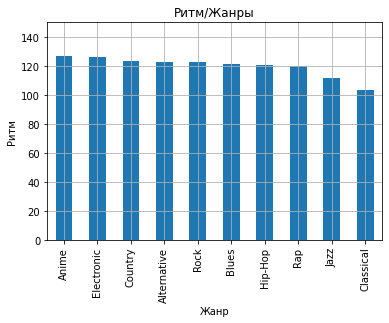

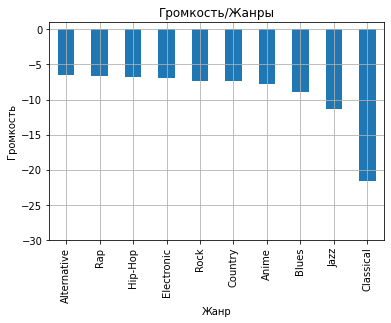

In [62]:
# строим графики распределения числовых характеристик треков по жанрам
display('Распределение усредненных числовых характеристик треков по жанрам')
plotly_num(train_copy,    
       'duration_ms',(0,450),      
       'Продолжительность трека',    
       'Продолжительность трека/Жанры'
          )
plotly_num(train_copy,    
       'tempo',(0,150),      
       'Ритм',    
       'Ритм/Жанры'
          )
plotly_num(train_copy,    
       'loudness',(-30,1),       
       'Громкость',    
       'Громкость/Жанры')

- Наибольшая  **продолжительность трека** у жанра **'Classical'**, наименьшая - у **'Hip-Hop'**. **На втором месте**, ожидаемо, **'Electronic'** и **'Jazz'**.

- **Ритм** у всех жанров **примерно одинаковый**. **Наименьшая** частота ритма у **'Classical'**, **наибольшая** - у **'Electronic'** и, как ни странно, - у  **'Anime'**.  

- **Наименьшей громкостью** обладают треки в жанре **'Classical'**, **наибольшей**  - в жанре **'Alternative'**. У остальных жанров громкость **плавно уменьшается**: **'Rap'**, **'Hip-Hop'**, **'Electronic'**, **'Rock'**, **'Country'**, **'Anime'**,   **'Blues'**, **'Jazz'**.  

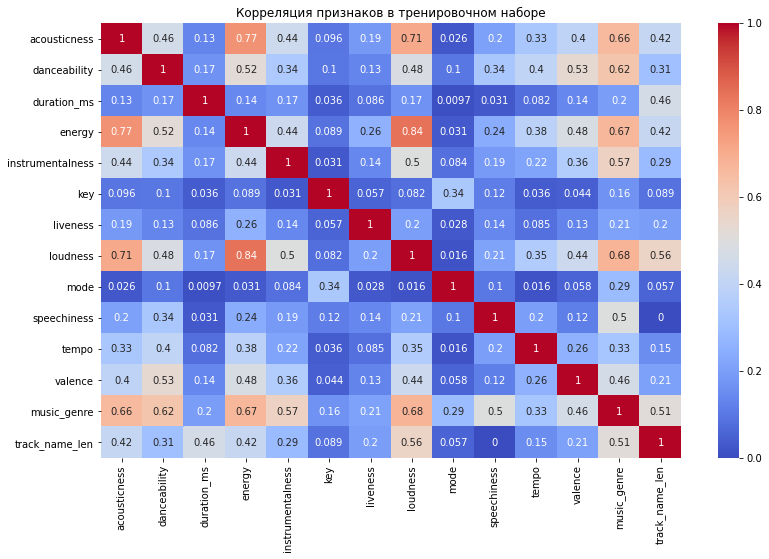

In [63]:
# строим тепловую карту корреляции с выбранными колонками:
# вычисляем матрицу корреляции с использованием Phi_K
# выбираем колонки
train_col = train_copy.columns[2:]
corr_matrix = train_copy[train_col].phik_matrix(train_copy[dup_col].select_dtypes(exclude='object'))

# визуализируем матрицу корреляции
plt.figure(figsize=(13, 8))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm')
plt.title('Корреляция признаков в тренировочном наборе')
plt.show() 

- Наибольшую корреляцию с целевой переменной ('music_genre') показывают: 'acousticness', 'danceability', 'energy', 'instrumentalness' и 'loudness'.   


- Наименьшая корреляция с целевой переменной ('music_genre') у признаков: 'key', 'liveness' и 'duration_ms'.


- Наибольшую взаимную корреляцию демонстрирует признаки: 'loudness' и 'energy', а каждый из них - с 'acousticness'.

### Тестовый набор

'Распределение числовых значений в обучающем наборе данных'

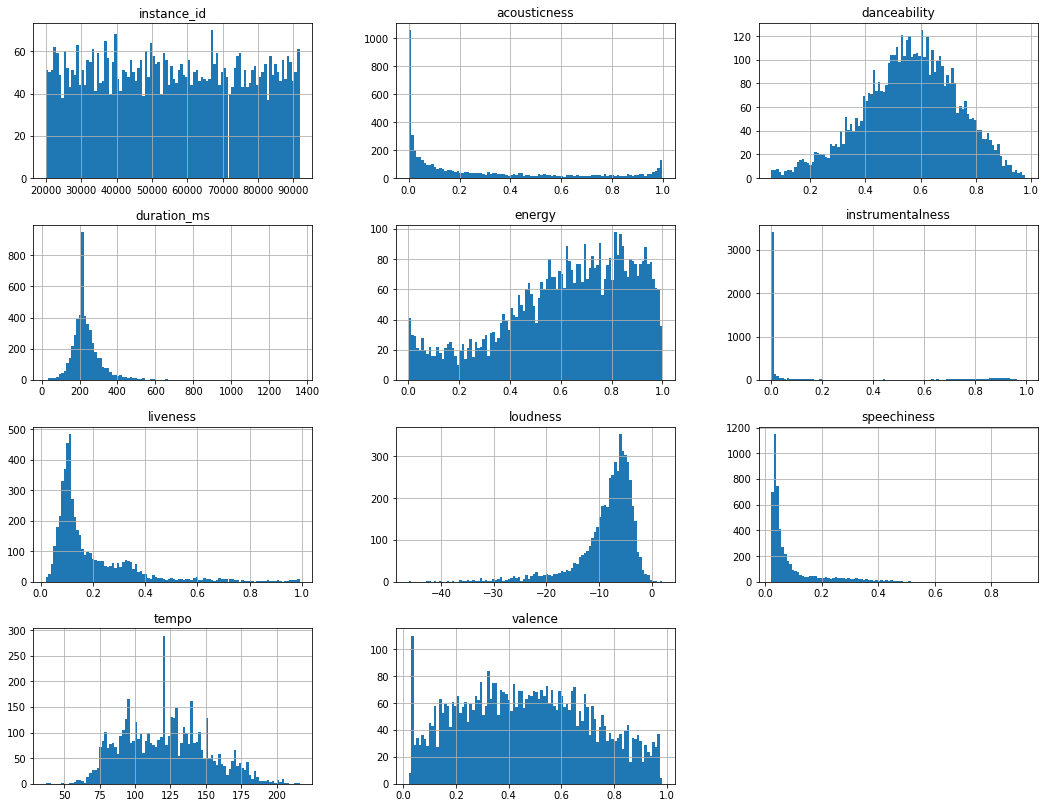

In [64]:
# изучаем столбцы с числовыми данными тестового набора на графиках
display('Распределение числовых значений в обучающем наборе данных')
df_test.hist(bins=100,figsize=[18,14]);

In [65]:
# смотрим распределение значений в числовых признаках
df_test.describe()

,instance_id,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,5099.000000,5099.000000,5099.000000,5099.000000,5099.000000,5099.000000,5099.000000,5099.000000,5099.000000,5099.000000,5099.000000
mean,55643.871347,0.276324,0.561888,239.307514,0.622030,0.165198,0.197924,-8.630186,0.092718,121.223860,0.465593
std,20762.384803,0.322657,0.170502,90.410039,0.251829,0.311940,0.166241,5.619766,0.100130,29.520696,0.244217
min,20012.000000,0.000002,0.059600,22.750000,0.001540,0.000000,0.020400,-46.122000,0.022600,37.114000,0.020500
25%,37571.000000,0.016600,0.451000,194.428500,0.465000,0.000000,0.096950,-10.231000,0.035700,96.732500,0.272000
50%,55246.000000,0.120000,0.568000,221.027000,0.660000,0.000157,0.129000,-7.135000,0.048700,120.039000,0.458000
75%,73702.000000,0.460000,0.681000,264.247000,0.826000,0.092750,0.248000,-5.127000,0.096550,141.002500,0.650000
max,91709.000000,0.996000,0.977000,1360.027000,0.999000,0.994000,0.990000,1.949000,0.918000,216.029000,0.982000


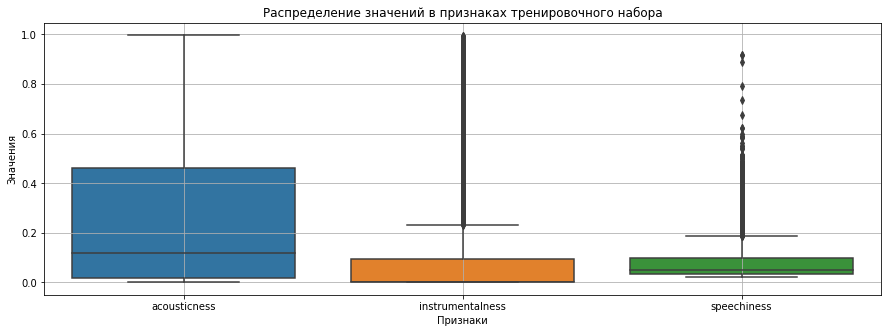

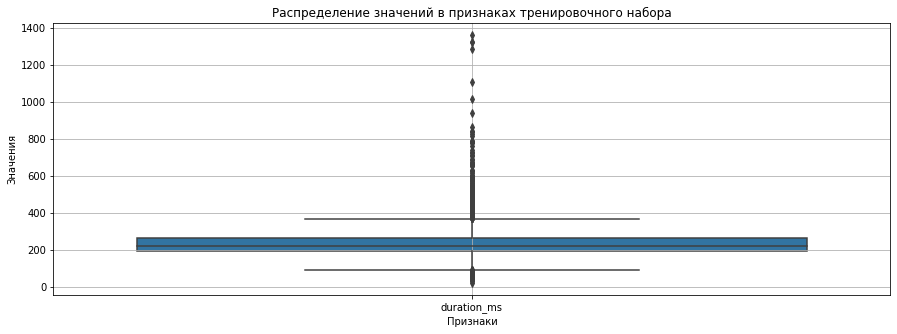

In [66]:
# смотрим разброс в признаках с выбросами в тестовом наборе    
columns = ['acousticness','instrumentalness','speechiness']
boxplotly(df_test[columns], 'Признаки', 'Значения', 'Распределение значений в признаках тренировочного набора')
columns = ['duration_ms']
boxplotly(df_test[columns], 'Признаки', 'Значения', 'Распределение значений в признаках тренировочного набора')

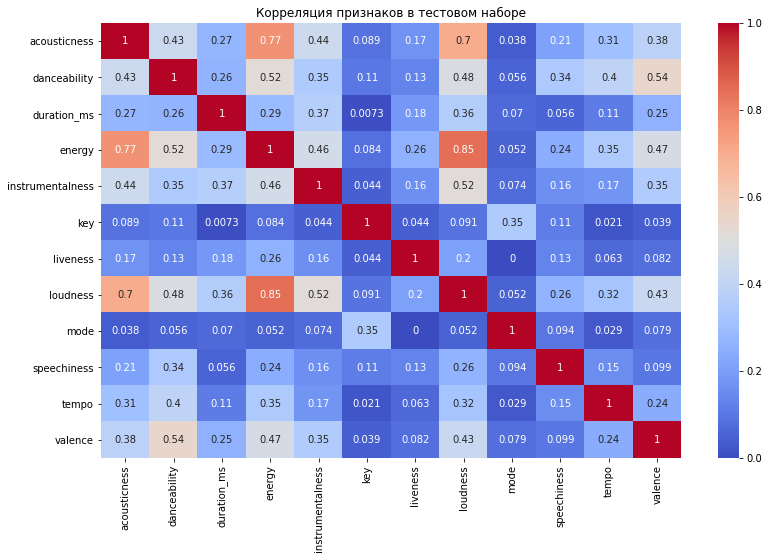

In [67]:
# строим тепловую диаграмму признаков тестового набора с выбранными колонками:
# вычисляем матрицу корреляции с использованием Phi_K
# выбираем колонки
test_col=df_test.columns[2:]

corr_matrix = df_test[test_col].phik_matrix(df_test[test_col].select_dtypes(exclude='object'))

# визуализируем матрицу корреляции
plt.figure(figsize=(13, 8))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm')
plt.title('Корреляция признаков в тестовом наборе')
plt.show()

### Вывод по третьему шагу

- В тестовом и тренировочном наборах схожие особенности и распределение признаков.



- Данные, в основном распределены неравномерно, но в некоторых столбцах есть выбросы. 


- Изучили изменения характеристик треков в зависимости от жанра и сделали соответствующие  выводы. 
 
 
- Треки по  жанрам распределены неравномерно, но, в целом, дисбаланс не критический. 
  
 
- В основном, признаки одного масштаба.
 
  
  
- Изучили максимумы и минимумы в распределении значений по жанрам:

    -  Обращают на себя внимание повторяющиеся значения в колонках с базовой нотой и модальностью ('key' и 'mode'); 
  
    -  Остальные значения распределены по жанрам плотными перекрывающимися диапазонами, что отразится на работе моделей. Особенно, значения в столбцах 'liveness' и 'tempo'.
  
  
  
- Наибольший разброс значений по жанрам демонстрируют признаки: 'acousticness', 'instrumentalness', 'speechiness', 'energy' и 'valence'. 



- Наибольшим и внушительным стандартным отклонением обладают значения в столбцах и 'duration_ms' и 'tempo'. Наименьшим - 'danceability'.


  
- Наибольшую корреляцию с целевой переменной ('music_genre') показывают: 'acousticness', 'danceability', 'energy', 'instrumentalness' и 'loudness'.   



- Наименьшая корреляция с целевой переменной ('music_genre') у признаков: 'key', 'liveness' и 'duration_ms'.


- Наибольшую взаимную корреляцию демонстрирует признаки: 'loudness' и 'energy', а каждый из них - с 'acousticness'.



## Разработка признаков

### Разделение на выборки

In [68]:
# формируем выборки и выделяем цель и признаки: 
# выделяем цель и признаки
target = df_train['music_genre']
features = df_train.drop('music_genre', axis=1)

# кодируем цель
labelencoder = LabelEncoder()
target = labelencoder.fit_transform(target)

# обратное преобразование 
# target = labelencoder.inverse_transform(target)

# формируем выборки: обучающую(75%) и валидационную(25%)
features_train, features_valid, target_train, target_valid  = train_test_split(features,
                                target,
                                test_size=0.25,
                                random_state=12345,
                                stratify=target) # сохраним исходное соотношение классов
# проверяем
print(features_train.shape)
print(target_train.shape)
print(features_valid.shape)
print(target_valid.shape)

(15290, 14)
(15290,)
(5097, 14)
(5097,)


### Пропуски и аномалии в выборках

In [69]:
# смотрим пропуски
print(features_train.isna().sum().sort_values())
print()
print(features_valid.isna().sum().sort_values())
print()
df_test.isna().sum().sort_values() 

instance_id           0
track_name            0
acousticness          0
danceability          0
duration_ms           0
energy                0
instrumentalness      0
liveness              0
loudness              0
speechiness           0
valence               0
tempo               338
mode                384
key                 566
dtype: int64

instance_id           0
track_name            0
acousticness          0
danceability          0
duration_ms           0
energy                0
instrumentalness      0
liveness              0
loudness              0
speechiness           0
valence               0
tempo               104
mode                122
key                 168
dtype: int64



instance_id         0
track_name          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
valence             0
dtype: int64

In [70]:
# смотрим аномалии в столбце duration_ms 
print(features_train['duration_ms'].describe())
print()
print(features_valid['duration_ms'].describe())
print()
df_test['duration_ms'].describe()

count    15290.000000
mean       220.087660
std        120.687588
min         -0.001000
25%        177.671000
50%        219.175000
75%        265.907000
max       2764.934000
Name: duration_ms, dtype: float64

count    5097.000000
mean      221.204993
std       143.402865
min        -0.001000
25%       177.160000
50%       220.808000
75%       266.187000
max      4497.994000
Name: duration_ms, dtype: float64



count    5099.000000
mean      239.307514
std        90.410039
min        22.750000
25%       194.428500
50%       221.027000
75%       264.247000
max      1360.027000
Name: duration_ms, dtype: float64

 - Используем для замены аномалий и пропусков прежний принцип.

#### Замена пропусков и аномалий в тренировочном наборе

In [71]:
# меняем пропуски в столбце key в тренировочном наборе
# на численное значение медианы столбца acousticness
for d in features_train['key'].unique():
    
    features_train.loc[features_train['key'
                         ].isna(), 'key'
                ] = features_train.loc[features_train['key'] == d, 'acousticness'].median()
# проверяем
print(features_train['key'].isna().sum())
features_train.groupby('key')['acousticness'].median().sort_values()

0


key
C#        0.0722
B         0.0756
F#        0.0997
D         0.1060
G#        0.1105
G         0.1190
0.0722    0.1220
A#        0.1365
E         0.1380
A         0.1430
C         0.1460
F         0.1715
D#        0.2280
Name: acousticness, dtype: float64

In [72]:
# меняем численное значение медианы на соответствующее буквенное 
features_train.loc[features_train['key'] == 0.0722, 'key'] = 'C#' 

# проверяем
print(features_train['key'].isna().sum())
features_train.groupby('key')['acousticness'].median().sort_values()

0


key
B     0.0756
C#    0.0828
F#    0.0997
D     0.1060
G#    0.1105
G     0.1190
A#    0.1365
E     0.1380
A     0.1430
C     0.1460
F     0.1715
D#    0.2280
Name: acousticness, dtype: float64

In [73]:
# проверяем распределение значений в столбце key 
features_train['key'].value_counts(normalize=True)

C#    0.141596
G     0.113865
C     0.103663
D     0.102027
A     0.098169
F     0.079398
E     0.074951
B     0.074951
G#    0.062786
A#    0.060955
F#    0.057619
D#    0.030020
Name: key, dtype: float64

In [74]:
# меняем пропуски в столбце tempo 
# проверяем до
print(features_train['tempo'].isna().sum())
print(features_train['tempo'].describe())
print()

# меняем пропуски в столбце tempo на медиану группы по столбцу key
name = 'tempo'
features_train[name] = np.where(features_train[name].isna(),
                 features_train['key'].map(features_train.groupby('key')[name].median()), 
                 features_train[name])

# проверяем после
print(features_train['tempo'].isna().sum())
print(features_train['tempo'].describe())

338
count    14952.000000
mean       121.018783
std         30.506522
min         34.765000
25%         95.840750
50%        120.012500
75%        141.977750
max        219.331000
Name: tempo, dtype: float64

0
count    15290.000000
mean       121.000892
std         30.168339
min         34.765000
25%         96.017000
50%        120.007000
75%        140.965250
max        219.331000
Name: tempo, dtype: float64


In [75]:
# меняем пропуски в столбце mode
# на численное значение медианы 
for d in features_train['mode'].unique():
    
    features_train.loc[features_train['mode'
                         ].isna(), 'mode'
                ] = features_train.loc[features_train['mode'] == d, 'acousticness'].median()
# проверяем
print(features_train['mode'].isna().sum())
features_train.groupby('mode')['acousticness'].median().sort_values()

0


mode
Minor    0.104
0.127    0.115
Major    0.127
Name: acousticness, dtype: float64

In [76]:
# меняем численное значение медианы на соответствующее буквенное 
features_train.loc[features_train['mode'] == 0.127, 'mode'] = 'Major' 

# проверяем
print(features_train['mode'].isna().sum())
features_train.groupby('mode')['acousticness'].median().sort_values()

0


mode
Minor    0.104
Major    0.126
Name: acousticness, dtype: float64

In [77]:
# проверяем пропуски
features_train.isna().sum()

instance_id         0
track_name          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
valence             0
dtype: int64

In [78]:
# меняем аномальное значение в столбце duration_ms
# проверяем до
print(features_train['duration_ms'].describe())
print()

# меняем пропуски в столбце duration_ms на медиану группы по столбцу key
name = 'duration_ms'
features_train[name] = np.where(features_train[name]== -0.001,
                 features_train['key'].map(features_train.groupby('key')[name].median()), 
                 features_train[name])
# проверяем после
print(features_train['duration_ms'].describe())

count    15290.000000
mean       220.087660
std        120.687588
min         -0.001000
25%        177.671000
50%        219.175000
75%        265.907000
max       2764.934000
Name: duration_ms, dtype: float64

count    15290.000000
mean       241.632759
std         96.643299
min         27.179000
25%        196.000000
50%        220.947000
75%        265.907000
max       2764.934000
Name: duration_ms, dtype: float64


#### Замена пропусков и аномалий в валидационном наборе

In [79]:
# меняем пропуски в столбце key в тестовом наборе, избегая утечки данных
# на численное значение медианы 
for d in features_valid['key'].unique():
    
    features_valid.loc[features_valid['key'
                         ].isna(), 'key'
                ] = features_train.loc[features_train['key'] == d, 'acousticness'].median()
# проверяем
print(features_valid['key'].isna().sum())
features_valid.groupby('key')['acousticness'].median().sort_values()

0


key
B         0.0818
F#        0.0887
C#        0.0906
A         0.1090
D         0.1180
A#        0.1260
0.1105    0.1270
E         0.1280
G         0.1415
G#        0.1450
F         0.1590
C         0.1760
D#        0.1950
Name: acousticness, dtype: float64

In [80]:
# меняем численное значение медианы на соответствующее буквенное 
features_valid.loc[features_valid['key'] == 0.1105, 'key'] = 'D' 

# проверяем
print(features_valid['key'].isna().sum())
features_valid.groupby('key')['acousticness'].median().sort_values()

0


key
B     0.0818
F#    0.0887
C#    0.0906
A     0.1090
D     0.1230
A#    0.1260
E     0.1280
G     0.1415
G#    0.1450
F     0.1590
C     0.1760
D#    0.1950
Name: acousticness, dtype: float64

In [81]:
# проверяем распределение значений в столбце key 
features_valid['key'].value_counts(normalize=True)

D     0.140671
C     0.110653
G     0.110261
C#    0.103198
A     0.100451
F     0.078674
B     0.073573
E     0.072592
F#    0.063763
G#    0.060232
A#    0.057092
D#    0.028840
Name: key, dtype: float64

In [82]:
# меняем пропуски в столбце tempo, избегая утечки данных

# проверяем до
print(features_valid['tempo'].isna().sum())
print(features_valid['tempo'].describe())
print()

# меняем пропуски в столбце tempo на медиану группы по столбцу key
name = 'tempo'
features_valid[name] = np.where(features_valid[name].isna(),
                 features_valid['key'].map(features_train.groupby('key')[name].median()), 
                 features_valid[name])

# проверяем после
print(features_valid['tempo'].isna().sum())
print(features_valid['tempo'].describe())

104
count    4993.000000
mean      120.720625
std        30.200463
min        46.718000
25%        95.997000
50%       120.013000
75%       141.914000
max       220.041000
Name: tempo, dtype: float64

0
count    5097.000000
mean      120.712986
std        29.891886
min        46.718000
25%        96.100000
50%       120.008000
75%       140.981000
max       220.041000
Name: tempo, dtype: float64


In [83]:
# меняем пропуски в столбце mode
# на численное значение медианы 
for d in features_valid['mode'].unique():
    
    features_valid.loc[features_valid['mode'
                         ].isna(), 'mode'
                ] = features_train.loc[features_train['mode'] == d, 'acousticness'].median()
# проверяем
print(features_valid['mode'].isna().sum())
features_valid.groupby('mode')['acousticness'].median().sort_values()

0


mode
0.104    0.105
Minor    0.118
Major    0.131
Name: acousticness, dtype: float64

In [84]:
# меняем численное значение медианы на соответствующее буквенное 
features_valid.loc[features_valid['mode'] == 0.104, 'mode'] = 'Minor' 

# проверяем
print(features_valid['mode'].isna().sum())
features_valid.groupby('mode')['acousticness'].median().sort_values()

0


mode
Minor    0.117
Major    0.131
Name: acousticness, dtype: float64

In [85]:
# проверяем пропуски
features_valid.isna().sum()

instance_id         0
track_name          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
valence             0
dtype: int64

In [86]:
# меняем аномальное значение в столбце duration_ms, избегая утечки данных
# проверяем до
print(features_valid['duration_ms'].describe())
print()

# меняем пропуски в столбце duration_ms на медиану группы по столбцу key
name = 'duration_ms'
features_valid[name] = np.where(features_valid[name]== -0.001,
                 features_valid['key'].map(features_train.groupby('key')[name].median()), 
                 features_valid[name])

# проверяем после
print(features_valid['duration_ms'].describe())

count    5097.000000
mean      221.204993
std       143.402865
min        -0.001000
25%       177.160000
50%       220.808000
75%       266.187000
max      4497.994000
Name: duration_ms, dtype: float64

count    5097.000000
mean      242.997180
std       123.415376
min        15.509000
25%       196.600000
50%       221.968000
75%       266.187000
max      4497.994000
Name: duration_ms, dtype: float64


In [87]:
# проверяем размер выборок после замены пропусков и аномалий
print(features_train.shape)
print(target_train.shape)
print(features_valid.shape)
print(target_valid.shape)
print(df_test.shape)

(15290, 14)
(15290,)
(5097, 14)
(5097,)
(5099, 14)


### Добавление новых признаков

 - Создадим новый признак на основе столбца с длиной названия трека, разделив его значения на коэффициент - значения столбца 'speechiness', чтобы усилить различия классов, и посмотрим корреляцию с другими признаками  

In [88]:
# добавляем новый признак в копию обучающего набора вместо track_name_len
train_copy['track_name_l_sp'] = (train_copy['track_name_len']/train_copy['speechiness'])
# уаляем ненужный признак track_name_len
train_copy.drop(['track_name_len'], axis=1, inplace=True)

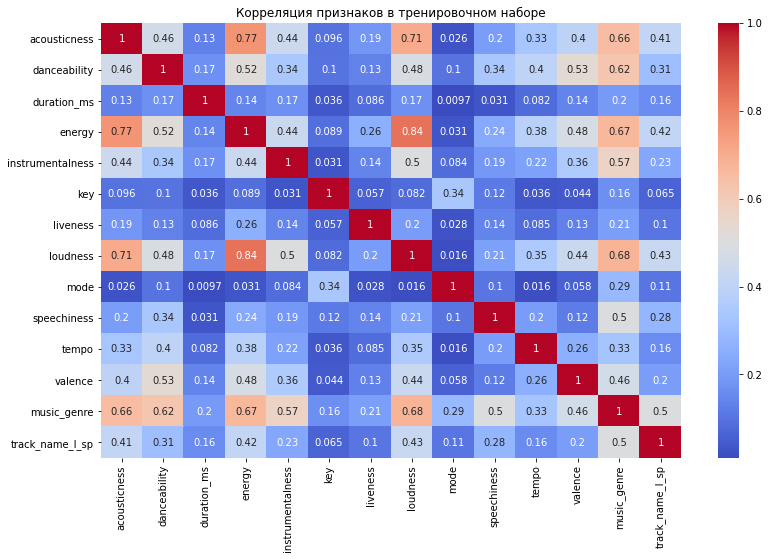

In [89]:
# строим тепловую карту корреляции с выбранными колонками
# вычисляем матрицу корреляции с использованием Phi_K

# выбираем колонки
train_col = train_copy.columns[2:]

# создаем матрицу
corr_matrix = train_copy[train_col].phik_matrix(train_copy[train_col].select_dtypes(exclude='object'))

# визуализируем матрицу корреляции
plt.figure(figsize=(13, 8))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm')
plt.title('Корреляция признаков в тренировочном наборе')
plt.show() 

In [90]:
# группируем данные по жанрам, выбирая средние значения признаков
df_group=train_copy.groupby('music_genre').mean().round(3).sort_values(by='track_name_l_sp', ascending=False)
df_group['track_name_l_sp']

music_genre
Classical      1067.730
Country         501.734
Blues           439.726
Rock            433.736
Jazz            383.903
Anime           326.880
Electronic      302.151
Alternative     281.439
Rap             161.084
Hip-Hop         130.787
Name: track_name_l_sp, dtype: float64

- Новый признак имеет неплохую корреляцию с целевой переменной, и слабую с другими признакам, кроме этого, имеет заметный  разброс по признакам. 

In [91]:
# добавляем новый категориальный признак:
# новый столбец, с длиной названия трека и делим на speechiness, чтобы усилить классовые отличия
features_train['track_name_l_sp'] = (features_train['track_name'].str.len()/features_train['speechiness']) 
features_valid['track_name_l_sp'] = (features_valid['track_name'].str.len()/features_valid['speechiness'])

df_test['track_name_l_sp'] = (df_test['track_name'].str.len()/df_test['speechiness'])

### Вывод по четвертому шагу


-  Выделили в тренировочном датасете цель и признаки, закодировали цель, разделили на обучающую и валидационную выборки из расчета 75%/25%.

-  Обработали в выборках пропуски и аномалии, заменив на медиану по признакам столбца 'key',  избегая утечки данных.


- Добавили новый синтетический признак - 'track_name_l_sp' как результат деления длины названия трека на значение столбца 'speechiness', чтобы усилить классовые отличия признаков и повысить обучаемость моделей.

## Проверка на мультиколлинеарность

### Тренировочный набор

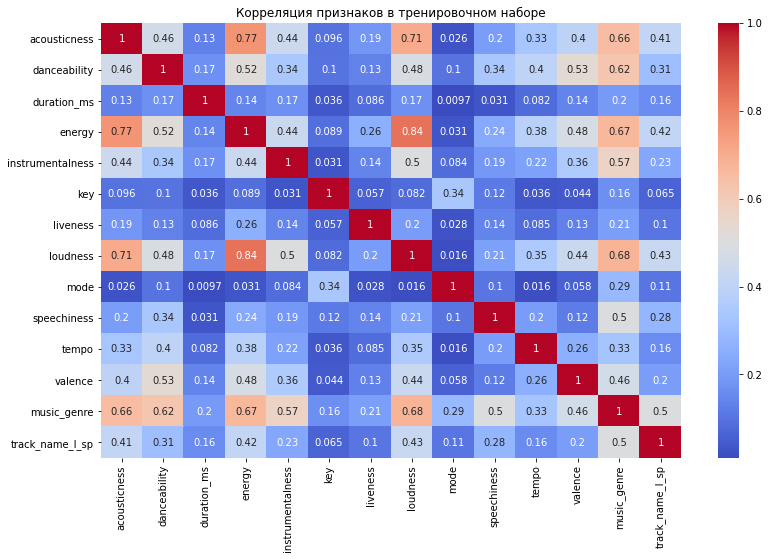

In [92]:
# строим тепловую карту корреляции признаков тренировочного набора с выбранными колонками
# вычисляем матрицу корреляции с использованием Phi_K
# выбираем колонки 
tr_col= train_copy.columns[2:]
corr_matrix = train_copy[tr_col].phik_matrix(train_copy[tr_col].select_dtypes(exclude='object'))

# визуализируем матрицу корреляции
plt.figure(figsize=(13, 8))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm')
plt.title('Корреляция признаков в тренировочном наборе')
plt.show()

### Тестовый набор

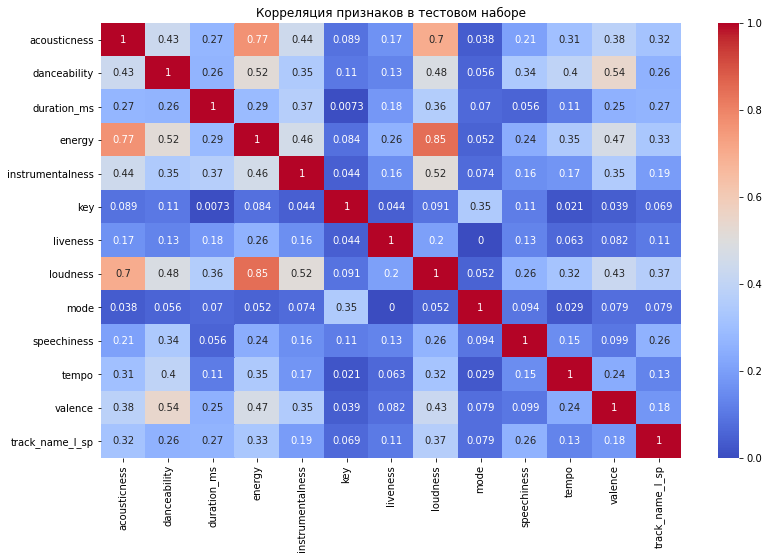

In [93]:
# строим тепловую диаграмму признаков тестового набора с выбранными колонками
# вычисляем матрицу корреляции с использованием Phi_K
# выбираем колонки
test_col = df_test.columns[2:]
corr_matrix = df_test[test_col].phik_matrix(df_test[test_col].select_dtypes(exclude='object'))

# визуализируем матрицу корреляции
plt.figure(figsize=(13, 8))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm')
plt.title('Корреляция признаков в тестовом наборе')
plt.show()

### Вывод по пятому шагу

-  В обучающем и тестовом наборах наблюдается сходная взаимная корреляция признаков.


- Наибольшую корреляцию с целевой переменной ('music_genre') в обучающем наборе  показывают: 'acousticness'(0.66), 'danceability'(0.62), 'energy'(0.67), 'loudness'(0.68) и 'instrumentalness'(0.57).    


- Наименьшая корреляция с целевой переменной ('music_genre') у признаков в обучающем наборе: 'key'(0.16), 'liveness'(0.21) и 'duration_ms'(0.20).


- Наибольшую взаимную корреляцию в обучающем наборе демонстрирует признаки: 'loudness' и 'energy' (0.84), а каждый из них - с 'acousticness'(0.71 и 0.77 соответственно). В тестовом наборе ситуация аналогичная.


-  Чтобы нивелировать взаимную корреляцию, на следующих шагах удалим некоторые признаки, отмасштабируем выборки и выберем для обучения нелинейные модели, наименее чувствительные к мультиколлинеарности. 


## Отбор признаков для обучения 

### Удаление лишних признаков 

In [94]:
# удаляем неинформативные столбцы instance_id, и track_name во всех наборах
features_train.drop(['track_name', 'instance_id'],axis=1, inplace=True)
features_valid.drop(['track_name', 'instance_id'],axis=1, inplace=True)

df_test.drop(['track_name', 'instance_id'], axis=1, inplace=True)

In [95]:
# удаляем столбцы key и liveness, обладающие малой информаивностью и низкой корреляцией к целевой переменной, 
# во всех наборах 
features_train.drop(['key', 'liveness'],axis=1, inplace=True)
features_valid.drop(['key', 'liveness'],axis=1, inplace=True)

df_test.drop(['key', 'liveness'], axis=1, inplace=True)

### Кодировка категориальных  признаков

In [96]:
# кодируем категориальные признаки и масштабируем численные:

# задаем категориальные признаки для OHE
ohe_features = features_train.select_dtypes(include='object').columns.to_list()

# задаем численные признаки
num_features = features_train.select_dtypes(exclude='object').columns.to_list()

In [97]:
# активируем кодировщик категориальных признаков
encoder_ohe = OneHotEncoder(drop='first', sparse=False)

# обучаем энкодер на заданных категориальных признаках тренировочной выборки
encoder_ohe.fit(features_train[ohe_features])

# кодируем категориальные признаки
features_train[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(features_train[ohe_features])

# удаляем лишние колонки 
features_train = features_train.drop(ohe_features, axis=1)

# проверяем
print(features_train.shape)

(15290, 11)


In [98]:
# кодируем категориальные признаки в валидационой выборке, кодировщиком, обученным на тренировочной
# кодируем категориальные признаки
features_valid[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(features_valid[ohe_features])

# удаляем лишние колонки 
features_valid = features_valid.drop(ohe_features, axis=1)

# проверяем
print(features_valid.shape)

(5097, 11)


In [99]:
# кодируем категориальные признаки в тестовом наборе, кодировщиком, обученным на тренировочной
# кодируем категориальные признаки
df_test[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(df_test[ohe_features])

# удаляем лишние колонки 
df_test = df_test.drop(ohe_features, axis=1)

# проверяем
print(df_test.shape)

(5099, 11)


### Масштабирование числовых признаков

In [100]:
# масштабируем численные признаки 
scaler = StandardScaler()
scaler.fit(features_train[num_features])
features_train[num_features] = scaler.transform(features_train[num_features])
features_valid[num_features] = scaler.transform(features_valid[num_features])
df_test[num_features] = scaler.transform(df_test[num_features])

# проверяем размер итоговых выборок
print(features_train.shape) 
print(features_valid.shape)
print(df_test.shape)

(15290, 11)
(5097, 11)
(5099, 11)


###  Вывод по шестому шагу


- Удалили лишние, малоинформативные и обладающие малой корреляцией к целевой переменной признаки: instance_id', 'track_name', 'key' и 'liveness'.

- Закодировали категориальные признаки и провели масштабирование числовых признаков.

- Выборки готовы к обучению. 

## Выбор и обучение моделей

### Обучение без подбора гиперпараметров

F1 'Случайного леса' на валидационной выборке: 0.42083578575632724
Матрица ошибок


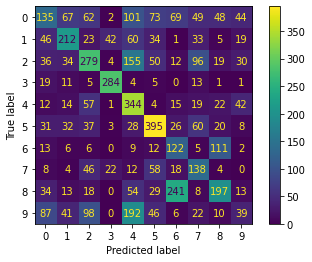

In [101]:
# активируем модель Случайного леса
model_RFC = RandomForestClassifier(random_state=12345,
                               n_estimators=70,
                               max_depth=9,
                               criterion='gini',
                               class_weight='balanced'
                              )
# обучаем модель на тренировочной выборке
model_RFC.fit(features_train, target_train)

# получаем предсказания модели на валидационной выборке
predicted_valid = model_RFC.predict(features_valid)

# считаем значение F1-меры на валидационной выборке 
f1_valid_RFC = f1_score(target_valid, predicted_valid, average='micro')

# выводим результаты
print("F1 'Случайного леса' на валидационной выборке:", f1_valid_RFC)

# строим матрицу ошибок
print('Матрица ошибок')
ConfusionMatrixDisplay.from_estimator(model_RFC, features_valid, target_valid)
plt.show()

F1 'Машины опорных векторов' на валидационной выборке: 0.4600745536590151
Матрица ошибок


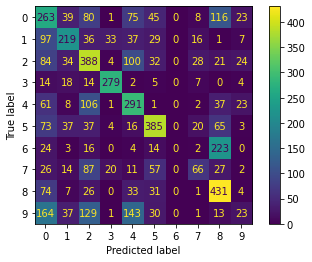

In [102]:
# активируем модель Опорных векторов
model_SVC = svm.SVC(decision_function_shape="ovo", random_state=12345, C=1.5)

# обучаем модель на тренировочной выборке
model_SVC.fit(features_train, target_train)

# получаем предсказания модели на валидационной выборке
predicted_valid = model_SVC.predict(features_valid)

# считаем значение F1-меры на валидационной выборке 
f1_valid_SVC = f1_score(target_valid, predicted_valid, average='micro')

# выводим результаты
print("F1 'Машины опорных векторов' на валидационной выборке:",f1_valid_SVC)

# строим матрицу ошибок
print('Матрица ошибок')
ConfusionMatrixDisplay.from_estimator(model_SVC, features_valid, target_valid)
plt.show()

F1 'Градиентного бустинга' на валидационной выборке: 0.4534039631155582
Матрица ошибок


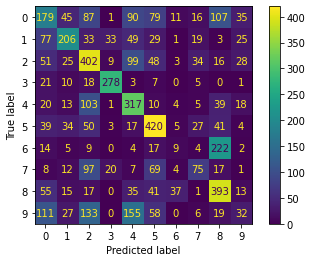

In [103]:
# активируем модель Градиентного бустинга
model_XGBC = xgboost.XGBClassifier(random_state=12345,
                              booster='dart',
                              max_depth=6,
                              subsample=1,                              
                              learning_rate=.3,
                              gamma=0,
                              use_label_encoder=False,
                              n_estimators=9
                             )
# обучаем модель на тренировочной выборке
model_XGBC.fit(features_train, target_train, eval_metric='error')

# предсказываем на валидационной выборке 
predicted_valid = model_XGBC.predict(features_valid)
# рассчитываем F1-меру на валидационной выборке
f1_valid_XGBC = f1_score(target_valid, predicted_valid, average='micro')

# выводим результаты
print("F1 'Градиентного бустинга' на валидационной выборке:", f1_valid_XGBC)

# строим матрицу ошибок
print('Матрица ошибок')
ConfusionMatrixDisplay.from_estimator(model_XGBC, features_valid, target_valid)
plt.show()

F1 'CatBoost' на валидационной выборке: 0.48047871296841277
Матрица ошибок


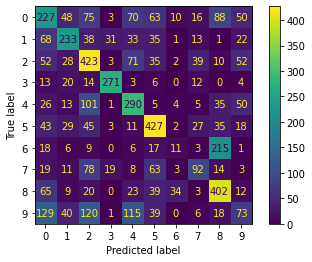

In [104]:
# активируем модель CatBoost
model_CatBoost = CatBoostClassifier(random_state=12345, iterations=2000, learning_rate=0.03)
# обучаем модель на тренировочной выборке
model_CatBoost.fit(features_train, target_train, verbose=False)

# получаем предсказания модели на валидационной выборке
predicted_valid = model_CatBoost.predict(features_valid)

# считаем значение F1-меры на валидационной выборке 
f1_valid_CB = f1_score(target_valid, predicted_valid, average='micro')

# выводим результаты
print("F1 'CatBoost' на валидационной выборке:",f1_valid_CB)

# строим матрицу ошибок
print('Матрица ошибок')
ConfusionMatrixDisplay.from_estimator(model_CatBoost, features_valid, target_valid)
plt.show()

In [105]:
# создаем таблицу с результатами работы моделей
df={'model' : ['RForest',  
               'SVC',
               'XGB',
               'CatBoost'],
 'f1_score': [f1_valid_RFC,  
              f1_valid_SVC,
              f1_valid_XGBC,
              f1_valid_CB]}
# выводим результаты
pd.DataFrame(df).sort_values(by='f1_score', ascending=False) 

,model,f1_score
3,CatBoost,0.480479
1,SVC,0.460075
2,XGB,0.453404
0,RForest,0.420836


### Подбор гиперпараметров

In [106]:
%%time
# подбираем гиперпараметры для Случайного леса
# методом HalvingGridSearchCV

# активируем модель
model_RFC_Hgrid = RandomForestClassifier(random_state=12345,
                               class_weight='balanced')

# задаем область поиска гиперпараметров
parametrs = {'n_estimators': range(10, 91, 10),
             'criterion': ['gini', 'entropy'],
             'max_depth': range (1, 21, 3)
            }
# запускаем поиск и обучение
Hgrid = HalvingGridSearchCV(model_RFC_Hgrid, parametrs, cv=10, n_jobs=-1, verbose=False, 
                            factor=2, min_resources='exhaust',
                            scoring='f1_micro')
Hgrid.fit(features_train, target_train)

# выводим найденные гиперпараметры
best_max_depth = Hgrid.best_params_.get('max_depth')
best_n_estimators = Hgrid.best_params_.get('n_estimators')
best_criterion =  Hgrid.best_params_.get('criterion')
display(Hgrid.best_params_)

{'criterion': 'entropy', 'max_depth': 16, 'n_estimators': 90}

CPU times: user 14.4 s, sys: 946 ms, total: 15.3 s
Wall time: 6min 26s


F1 'Случайного леса' на валидационной выборке: 0.4498724740043163
Матрица ошибок


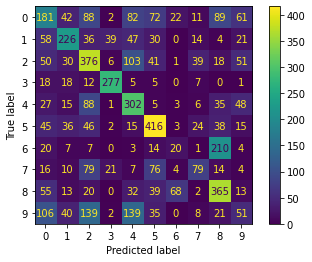

In [107]:
# запускаем модель Случайного леса с подобранными гиперпараметрами
model_RFC_Hgrid = RandomForestClassifier(random_state=12345,
                               n_estimators=best_n_estimators,
                               max_depth=best_max_depth,
                               criterion=best_criterion,
                               class_weight='balanced')
# обучаем модель на тренировочной выборке
model_RFC_Hgrid.fit(features_train, target_train)

# получаем предсказания модели на валидационной выборке
predicted_valid = model_RFC_Hgrid.predict(features_valid)

# считаем значение F1-меры на валидационной выборке 
f1_valid_RFC_selection = f1_score(target_valid, predicted_valid, average='micro')

# выводим результаты
print("F1 'Случайного леса' на валидационной выборке:", f1_valid_RFC_selection)
print('Матрица ошибок')
ConfusionMatrixDisplay.from_estimator(model_RFC_Hgrid, features_valid, target_valid)
plt.show()

In [108]:
%%time
# подбираем гиперпараметры для Опорных векторов  
# методом HalvingGridSearchCV

# активируем модель
model_SVC_Hgrid = svm.SVC(decision_function_shape="ovo")

# задаем область поиска гиперпараметров
parametrs = {'C': [0.5, 1.0, 1.5]}

# запускаем поиск и обучение
Hgrid = HalvingGridSearchCV(model_SVC_Hgrid, parametrs, cv=10, n_jobs=-1, verbose=False, 
                            factor=2, min_resources='exhaust',
                            scoring='f1_micro')
Hgrid.fit(features_train, target_train)

# выводим найденные гиперпараметры
best_C = Hgrid.best_params_.get('C')
display(Hgrid.best_params_)

{'C': 1.5}

CPU times: user 11.4 s, sys: 135 ms, total: 11.5 s
Wall time: 8min 41s


F1 'Машины опорных векторов' на валидационной выборке: 0.4600745536590151
Матрица ошибок


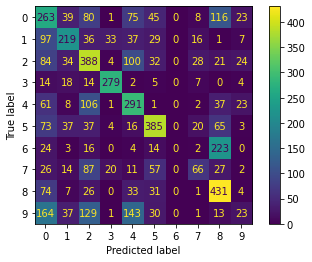

In [109]:
# запускаем модель Опорных векторов с подобранными гиперпараметрами
model_SVC_Hgrid = svm.SVC(decision_function_shape="ovo", random_state=12345, C=best_C)

# обучаем модель на тренировочной выборке
model_SVC_Hgrid.fit(features_train, target_train)

# получаем предсказания модели на валидационной выборке
predicted_valid = model_SVC_Hgrid.predict(features_valid)

# считаем значение F1-меры на валидационной выборке 
f1_valid_SVC_selection = f1_score(target_valid, predicted_valid, average='micro')

# выводим результаты
print("F1 'Машины опорных векторов' на валидационной выборке:",f1_valid_SVC_selection)
print('Матрица ошибок')
ConfusionMatrixDisplay.from_estimator(model_SVC_Hgrid, features_valid, target_valid)
plt.show()

In [110]:
%%time
# подбираем гиперпараметры для Градиентного бустинга 
# методом HalvingGridSearchCV

# активируем модель
model_XGBC_Hgrid = xgboost.XGBClassifier(random_state=12345,
                                   booster='dart',
                                   subsample=1,                              
                                   learning_rate=.3,
                                   gamma=0,
                                   use_label_encoder=False
                                  )
# задаем область поиска гиперпараметров
parametrs = {'max_depth': range(1, 15, 3),
             'n_estimators': range(1, 12, 3)             
            }
# запускаем поиск и обучение
Hgrid = HalvingGridSearchCV(model_XGBC_Hgrid, parametrs, cv=10, n_jobs=-1, verbose=False, 
                            factor=2, min_resources='exhaust',
                            scoring='f1_micro')
Hgrid.fit(features_train, target_train, eval_metric='error')

# выводим найденные гиперпараметры
best_max_depth_XGBС = Hgrid.best_params_.get('max_depth')
best_n_estimators_XGBС = Hgrid.best_params_.get('n_estimators')
display(Hgrid.best_params_)

{'max_depth': 7, 'n_estimators': 10}

CPU times: user 11.3 s, sys: 266 ms, total: 11.5 s
Wall time: 2min 59s


F1 'Градиентного бустинга' на валидационной выборке: 0.4530115754365313
Матрица ошибок


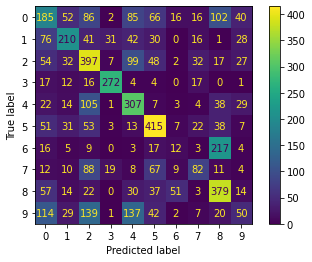

In [111]:
# запускаем модель Градиентного бустинга с подобранными гиперпараметрами
model_XGBC_Hgrid = xgboost.XGBClassifier(random_state=12345,
                                   booster='dart',
                                   max_depth=best_max_depth_XGBС,
                                   subsample=1,                              
                                   learning_rate=.3,
                                   gamma=0,
                                   use_label_encoder=False,
                                   n_estimators=best_n_estimators_XGBС
                                  )
# обучаем модель на тренировочной выборке
model_XGBC_Hgrid.fit(features_train, target_train, eval_metric='error')

# предсказываем на валидационной выборке 
predicted_valid = model_XGBC_Hgrid.predict(features_valid)

# рассчитываем F1-меру на валидационной выборке
f1_valid_XGBC_selection = f1_score(target_valid, predicted_valid, average='micro')

# выводим результаты
print("F1 'Градиентного бустинга' на валидационной выборке:", f1_valid_XGBC_selection)
print('Матрица ошибок')
ConfusionMatrixDisplay.from_estimator(model_XGBC_Hgrid, features_valid, target_valid)
plt.show()

In [112]:
%%time
# подбираем гиперпараметры для CatBoost
# методом HalvingGridSearchCV

# активируем модель
model_CatBoost_Hgrid = CatBoostClassifier(random_state=12345)

# задаем область поиска гиперпараметров
parametrs = {'iterations': [1000, 2000],
             'depth':[2,3,5]                   
            }
# запускаем поиск и обучение
Hgrid = HalvingGridSearchCV(model_CatBoost_Hgrid, parametrs, cv=10, n_jobs=-1, verbose=1, 
                            factor=2, min_resources='exhaust',
                            scoring='f1_micro')
Hgrid.fit(features_train, target_train, verbose=False)

# выводим найденные гиперпараметры
best_iterations_СB = Hgrid.best_params_.get('iterations')
best_depth_СB = Hgrid.best_params_.get('depth')
display(Hgrid.best_params_)

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 3822
max_resources_: 15290
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 6
n_resources: 3822
Fitting 10 folds for each of 6 candidates, totalling 60 fits
----------
iter: 1
n_candidates: 3
n_resources: 7644
Fitting 10 folds for each of 3 candidates, totalling 30 fits
----------
iter: 2
n_candidates: 2
n_resources: 15288
Fitting 10 folds for each of 2 candidates, totalling 20 fits


{'depth': 3, 'iterations': 1000}

CPU times: user 31.8 s, sys: 1.08 s, total: 32.9 s
Wall time: 12min 8s


F1 'CatBoost' на валидационной выборке: 0.4710614086717677
Матрица ошибок


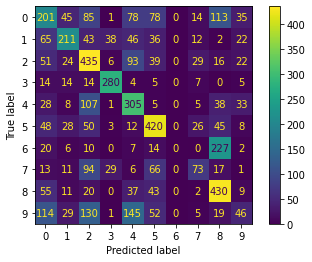

In [113]:
# запускаем модель CatBoost с подобранными гиперпараметрами
model_CatBoost_Hgrid = CatBoostClassifier(random_state=12345,
                                    iterations=best_iterations_СB,
                                    depth=best_depth_СB,
                                    learning_rate=0.03)

# обучаем модель на тренировочной выборке
model_CatBoost_Hgrid.fit(features_train, target_train, verbose=False)
         
# получаем предсказания модели на валидационной выборке
predicted_valid = model_CatBoost_Hgrid.predict(features_valid)

# считаем значение F1-меры на валидационной выборке 
f1_valid_CB_selection = f1_score(target_valid, predicted_valid, average='micro')

# получаем предсказание модели на тестовой выборке 
#predicted_test_CB = model_CatBoost.predict(df_test)

# выводим результаты
print("F1 'CatBoost' на валидационной выборке:",f1_valid_CB_selection)

# строим матрицу ошибок
print('Матрица ошибок')
ConfusionMatrixDisplay.from_estimator(model_CatBoost_Hgrid, features_valid, target_valid)
plt.show()

In [114]:
# создаем таблицу с результатами работы моделей
df={'model' : ['RForest',  
               'SVC',
               'XGBС',
               'CatBoost'],
 'f1_score': [f1_valid_RFC_selection, 
              f1_valid_SVC_selection,
              f1_valid_XGBC_selection,
              f1_valid_CB_selection]}
# выводим результаты
pd.DataFrame(df).sort_values(by='f1_score', ascending=False) 

,model,f1_score
3,CatBoost,0.471061
1,SVC,0.460075
2,XGBС,0.453012
0,RForest,0.449872


### Вывод по седьмому шагу

- Обучили модели на обучающей и проверили на валидацинной выборках:

   -  До подбора гиперпараметров лучший результат метрики F1 показала модель CatBoost 0.480479, второй результат -  Машина опорных векторов (0.460075), третий  - Градентный бустинг (0.453404), Случайный лес на последнем месте с результатом  0.420836;

   -  После  подбора гиперпараметров лучший результат F1-0.473416 показала модель CatBoost.  Второе место у Машины опорных векторов - 0.460075, у Градиентного бустинга и Случайного леса показатель F1  -  0.453012 и 0.447322, соответственно. 
   
   
- Все модели хорошо предсказывают Электронику(5) и Блюз(2), а чаще всего ошибаются с выбором Рока(9) и Хип-Хопа(6). Они определяют Хип-Хоп(6) как Рэп(8). А Рок(9) как Кантри(4).  

- После подбора гиперпараметров, у всех моделей, кроме Случайного леса показатели F1 не улучшились.

- Дольше всего подбирались гиперпараметры у CatBoost - 14min 47s.

## Оценка качества предсказаний моделей

In [115]:
#проверяем качество Cлучайного леса кросс-валидацией
def model_score(features_valid,target_valid):
    model_RFC_сv = RandomForestClassifier(random_state=12345,
                            n_estimators=best_n_estimators,
                            max_depth=best_max_depth,
                            criterion='gini',
                            class_weight='balanced')
    scores = cross_val_score(model_RFC_сv, features_valid, target_valid, scoring='f1_micro', cv=10)
    final_score = scores.mean()
    return final_score

final_score_RFC_сv = model_score(features_valid,target_valid)
print('Средняя оценка качества модели(F1) Случайного леса:', final_score_RFC_сv)

Средняя оценка качества модели(F1) Случайного леса: 0.4386844639624023


In [116]:
#проверяем качество Опорных векторов кросс-валидацией
def model_score(features_valid,target_valid):
    model_SCV_cv = svm.SVC(decision_function_shape="ovo", 
                    C=best_C)                         
    scores = cross_val_score(model_SCV_cv, features_valid, target_valid, scoring='f1_micro', cv=10)
    final_score = scores.mean()
    return final_score

final_score_SCV_cv = model_score(features_valid,target_valid)
print('Средняя оценка качества модели(F1) Машины опорных векторов:', final_score_SCV_cv)

Средняя оценка качества модели(F1) Машины опорных векторов: 0.44731769328556564


In [117]:
#проверяем качество Градиентного бустинга кросс-валидацией
def model_score(features_valid,target_valid):
    model_XGBC_cv = xgboost.XGBClassifier(random_state=12345,
                              booster='dart',
                              max_depth=best_max_depth_XGBС,
                              subsample=1,                              
                              learning_rate=.3,
                              gamma=0,
                              use_label_encoder=False,
                              n_estimators=best_n_estimators_XGBС, 
                              eval_metric='error'
                             )                         
    scores = cross_val_score(model_XGBC_cv, features_valid, target_valid, scoring='f1_micro', cv=10)
    final_score = scores.mean()
    return final_score

final_score_XGBC_cv = model_score(features_valid, target_valid)
print('Средняя оценка качества модели(F1) Градиентного бустинга:', final_score_XGBC_cv)

Средняя оценка качества модели(F1) Градиентного бустинга: 0.42338071574405794


In [118]:
#проверяем качество CatBoost кросс-валидацией
def model_score(features_valid,target_valid):
    model_CatBoost_cv = CatBoostClassifier(random_state=12345, 
                                        iterations=best_iterations_СB,
                                        depth=best_depth_СB,
                                        learning_rate=0.03, 
                                        verbose=False)    
    scores = cross_val_score(model_CatBoost_cv, features_valid, target_valid, scoring='f1_micro', cv=10)
    final_score = scores.mean()
    return final_score

final_score_CB_cv = model_score(features_valid, target_valid)
print('Средняя оценка качества модели(F1) CatBoost:', final_score_CB_cv )

Средняя оценка качества модели(F1) CatBoost: 0.456732154551408


In [119]:
# создаем таблицу с результатами работы моделей
df={'model' : ['RForest',  
               'SVC',
               'XGBС',
               'CatBoost'],
 'f1_score': [final_score_RFC_сv, 
              final_score_SCV_cv,
              final_score_XGBC_cv,
              final_score_CB_cv]}
# выводим результаты
pd.DataFrame(df).sort_values(by='f1_score', ascending=False)

,model,f1_score
3,CatBoost,0.456732
1,SVC,0.447318
0,RForest,0.438684
2,XGBС,0.423381


### Вывод по восьмому шагу

- Проверили среднее качество предсказаний моделей кросс-валидацией:

    - Лучший результат метрики F1 на кросс-валидации показала модель CatBoost 0.45869409453368776, второй результат -  Машина опорных векторов (0.4473176932855656), третий  -  Случайный лес (0.431230016564582), Градентный бустинг - на последнем месте с результатом  0.42338071574405794;

## Анализ важности признаков лучшей модели

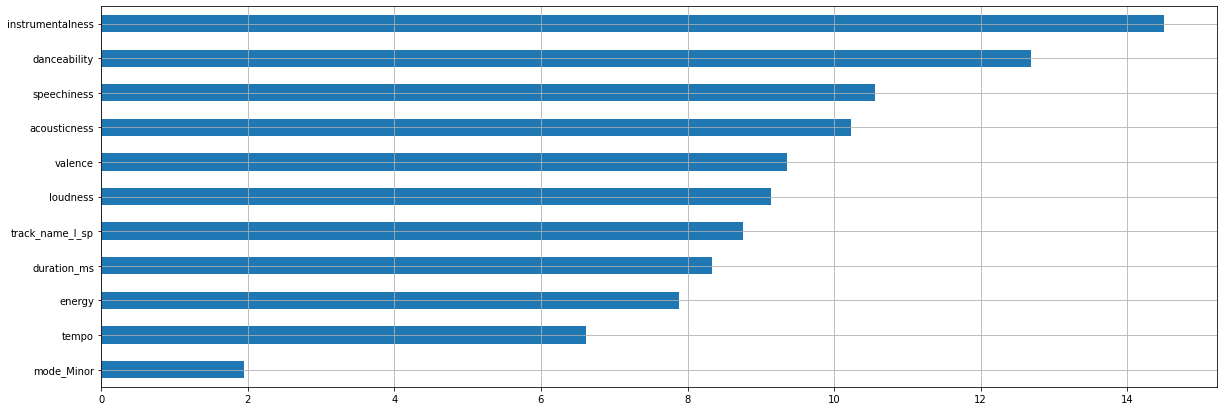

In [120]:
# строим график важности признаков CatBoost
pd.Series(model_CatBoost.feature_importances_, index=model_CatBoost.feature_names_)\
            .sort_values(ascending=True).plot.barh(figsize=(20,7), grid=True);

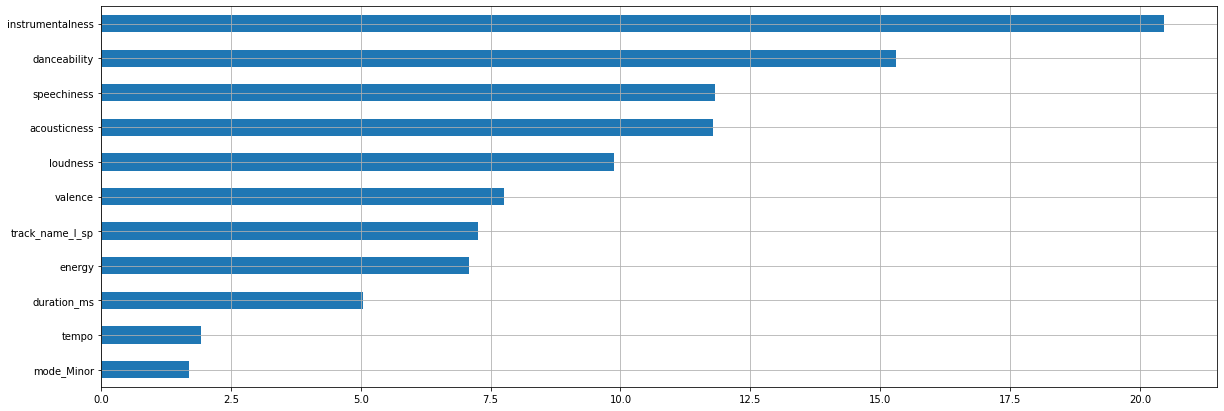

In [121]:
# строим график важности признаков CatBoost
pd.Series(model_CatBoost_Hgrid.feature_importances_, index=model_CatBoost_Hgrid.feature_names_)\
            .sort_values(ascending=True).plot.barh(figsize=(20,7), grid=True);

### Вывод по девятому шагу


-  Наиболее важным признаком для CatBoost является 'instrumentalness'. Видимо, модель вокальность делит жанры на наиболее понятные для модели кластеры. 


-  Наименее важным признаком из отобранных, предсказуемо, оказался 'mode' - признак принимает всего два значения, один из которых удален при шифровании.      


-  В пятерку самых важных признаков входят 'instrumentalness', 'danceability',  'speechiness', 'acousticness' и 'loudness'.

-  Важность одних и тех же признаков при обучении без подбора и при подборе гиперпараметров для одной и той же модели отличается.


## Общий вывод 

-  В процессе работы над проектом, мы:

    - Загрузили и изучили данные;
        
    - Провели предобработку и разведочный анализ;
    
    - Создали и добавили новые признаки;
    
    - Проверили признаки на мультиколлинеарность;
    
    - Отобрали и подготовили признаки для обучения;
        
    - Выбрали и обучили модели ML, подобрав для них лучшие гиперпараметры;
    
    - Оценили качество предсказаний моделей (по метрике F1) кросс-валидацией; 
    
    - Проанализировали важность признаков лучшей модели;
    
    - Сформулировали и оформили промежуточный и общий выводы.



- **Резюме**: 
       
     - Лучше всего с поставленной задачей справилась **модель CatBoost** с количеством итераций (iterations) 2000, и 'learning_rate'  - 0.03. Модель показала на валидационной выборке значение метрики **F1 - 0.480479**, это значит, что модель правильно предсказала жанр (один из десяти) трека почти в половине случаев. 
     
     - **Наиболее важным признаком** для модели является **'instrumentalness'**.     


## Дополнение. Добавление предсказания к тестовой выборке

In [122]:
# получаем предсказание лучшей модели на тестовой выборке 
predicted_test_CB = model_CatBoost.predict(df_test)

In [123]:
# декодируем предсказание
predicted_test_CB = labelencoder.inverse_transform(np.ravel(predicted_test_CB))

In [124]:
# копируем контрольный датасет 
sample_submit_CB = sample_submit

In [125]:
# добавляем предсказание в контрольный датасет
sample_submit_CB['music_genre'] = predicted_test_CB

In [126]:
# проверяем
display(sample_submit_CB.head())

,instance_id,music_genre
0,48564,Rap
1,72394,Blues
2,88081,Rap
3,78331,Country
4,72636,Alternative


In [127]:
# выгружаем файл
sample_submit_CB.to_csv('../Downloads/sample_submit_CB.csv', index=False)